# Aleph insights wednesday 19th september interview

In [1]:
#import libraries that might be needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline0
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap

In [2]:
#load dataset
aleph = pd.read_excel("Copy of globalterrorismdb_0919dist.xlsx")

In [3]:
#make a new killandwound feature by adding nkill and nwound and make a 0/1 variable for logistic regression in data science part
aleph['killandwound']=aleph['nkill']+aleph['nwound']
aleph['kwfinal'] = aleph['killandwound'].apply(lambda x: 0 if x == 0 else 1)

In [4]:
alephcopy = aleph.copy()

In [5]:
#check head of the dataset
aleph.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,killandwound,kwfinal
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,PGIS,0,0,0,0,NaN,1.0,1
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,PGIS,0,1,1,1,NaN,0.0,0
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,1.0,1
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN,1
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,PGIS,-9,-9,1,1,NaN,NaN,1


In [6]:
#check the column names
aleph.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY', 'related', 'killandwound', 'kwfinal'],
      dtype='object', length=137)

In [7]:
# describe the dataset
aleph.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,killandwound,kwfinal
count,1.914640e+05,191464.000000,191464.000000,191464.000000,191464.000000,191464.000000,191464.000000,186884.000000,186883.000000,191463.000000,...,8.380000e+02,611.000000,12045.000000,11454.000000,191464.000000,191464.000000,191464.000000,191464.000000,173279.000000,191464.000000
mean,2.003486e+11,2003.420136,6.462510,15.507688,0.047476,131.290446,7.205167,23.462121,28.902126,1.458172,...,6.961705e+05,217.004910,4.643005,-29.816309,-4.521727,-4.439247,0.088951,-3.930582,5.294144,0.655622
std,1.334949e+09,13.349405,3.388515,8.807727,0.212656,112.058063,2.923811,18.405309,57.231040,0.991536,...,9.792528e+06,2796.042504,2.034429,65.183303,4.543713,4.639931,0.556741,4.689726,48.681758,0.475166
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000
25%,1.991083e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,6.000000,11.274796,7.052742,1.000000,...,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000,0.000000
50%,2.010031e+11,2010.000000,6.000000,15.000000,0.000000,98.000000,7.000000,31.445840,43.471427,1.000000,...,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000,1.000000,1.000000
75%,2.015013e+11,2015.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.621521,68.783077,1.000000,...,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
max,2.018123e+11,2018.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,2.750000e+08,48000.000000,7.000000,2912.000000,1.000000,1.000000,1.000000,1.000000,12263.000000,1.000000


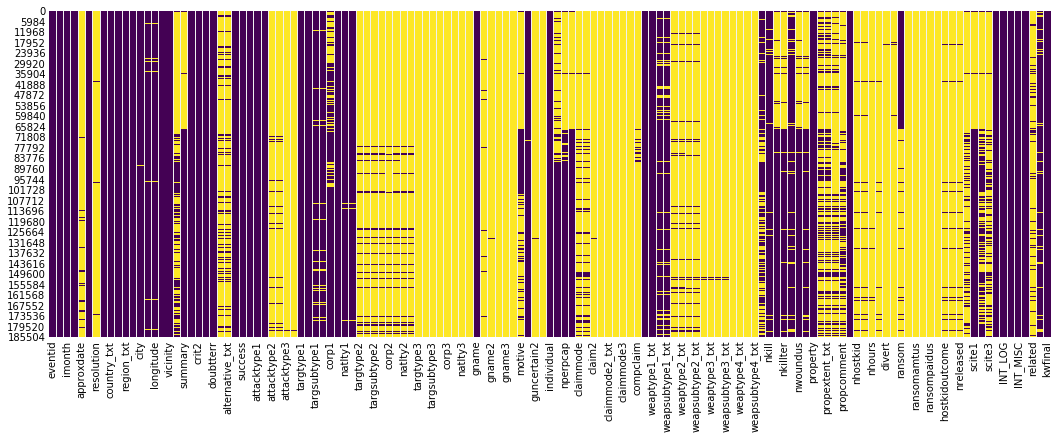

In [8]:
#how much of the dataset is null - Alot :( should all be dark,
plt.figure(figsize=(16,6))
sns.heatmap(aleph.isnull(),cmap='viridis',cbar=False)

In [9]:
print('Number of duplicates:', aleph.duplicated().sum())
aleph.isnull().sum()

Number of duplicates: 0


eventid              0
iyear                0
imonth               0
iday                 0
approxdate      181172
                 ...  
INT_MISC             0
INT_ANY              0
related         164766
killandwound     18185
kwfinal              0
Length: 137, dtype: int64

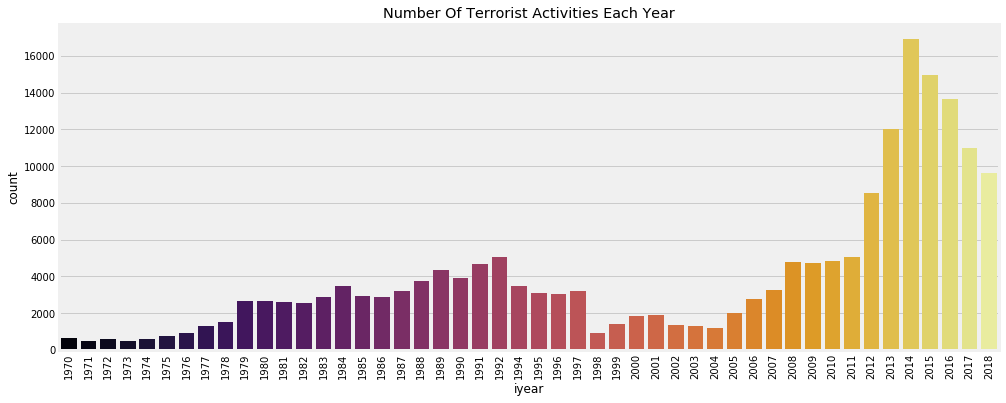

In [10]:
#a bar chart by seaborn to demonstrate the number of terrorist events against year throughout the whole dataset -(nb. 1993 missing)
plt.subplots(figsize=(15,6))
sns.countplot('iyear',data=aleph,palette='inferno')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [11]:
#check percentage of gname that is null - was 45% - removed all events which are not associated with a group! now its zero!
len(aleph[aleph['gname']=="Unknown"])/len(aleph)*100

45.053378180754606

In [12]:
#Filter the last 20 years (2 decades) of the database

In [13]:
aleph = aleph[aleph.iyear.isin(["1998","1999","2000","2001", "2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018"])]

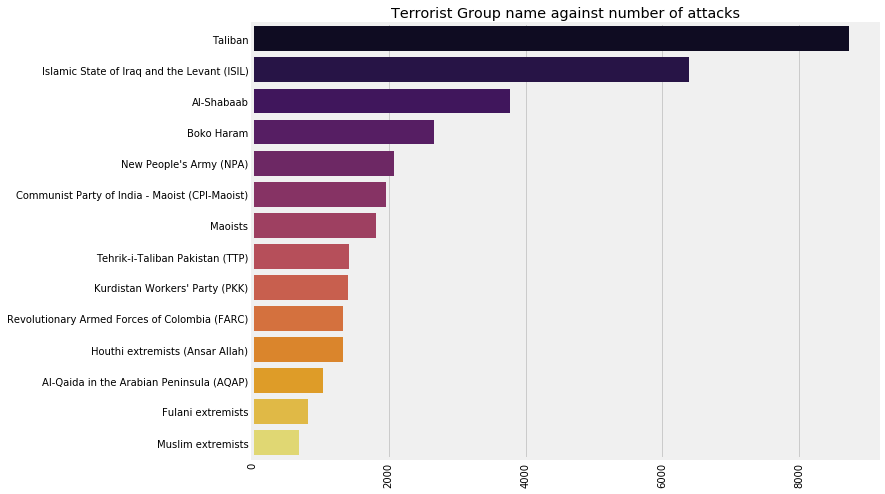

In [14]:
# seaborn plot of terrorist groups with highest terror attacks - taliban are number 1 (afghanistan) followed by a group in iraq
sns.barplot(aleph['gname'].value_counts()[1:15].values,aleph['gname'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Group name against number of attacks')
plt.show()

In [15]:
#Max/Min kills event group and date.
print('Maximum people killed in an attack are: ',aleph['nkill'].max(),'GROUP',aleph.loc[aleph['nkill'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['nkill'].idxmax()].iyear,aleph.loc[aleph['nkill'].idxmax()].imonth)
print('Minimum people killed in an attack are: ',aleph['nkill'].min(),'GROUP',aleph.loc[aleph['nkill'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['nkill'].idxmin()].iyear,aleph.loc[aleph['nkill'].idxmax()].imonth)

Maximum people killed in an attack are:  1570.0 GROUP Islamic State of Iraq and the Levant (ISIL) Year/Month: 2014 6
Minimum people killed in an attack are:  0.0 GROUP Unknown Year/Month: 1998 6


In [16]:
#Max/Min wounded event group and date.
print('Maximum people wounded in an attack are: ',aleph['nwound'].max(),'GROUP',aleph.loc[aleph['nwound'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['nwound'].idxmax()].iyear,aleph.loc[aleph['nwound'].idxmax()].imonth)
print('Minimum people wounded in an attack are: ',aleph['nwound'].min(),'GROUP',aleph.loc[aleph['nwound'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['nwound'].idxmax()].iyear,aleph.loc[aleph['nwound'].idxmax()].imonth)

Maximum people wounded in an attack are:  10878.0 GROUP Al-Qaida Year/Month: 2001 9
Minimum people wounded in an attack are:  0.0 GROUP Loyalist Volunteer Forces (LVF) Year/Month: 2001 9


In [17]:
#Max/min killandwounded event group and date.
print('Maximum people wounded in an attack are: ',aleph['killandwound'].max(),'GROUP',aleph.loc[aleph['killandwound'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['nwound'].idxmax()].iyear,aleph.loc[aleph['nwound'].idxmax()].imonth)
print('Minimum people wounded in an attack are: ',aleph['killandwound'].min(),'GROUP',aleph.loc[aleph['killandwound'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['nwound'].idxmax()].iyear,aleph.loc[aleph['nwound'].idxmax()].imonth)

Maximum people wounded in an attack are:  12263.0 GROUP Al-Qaida Year/Month: 2001 9
Minimum people wounded in an attack are:  0.0 GROUP Unknown Year/Month: 2001 9


C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

C:\Users\marcu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



Text(0.5, 1.0, 'Terroist attacks with greater than 15 casualities')

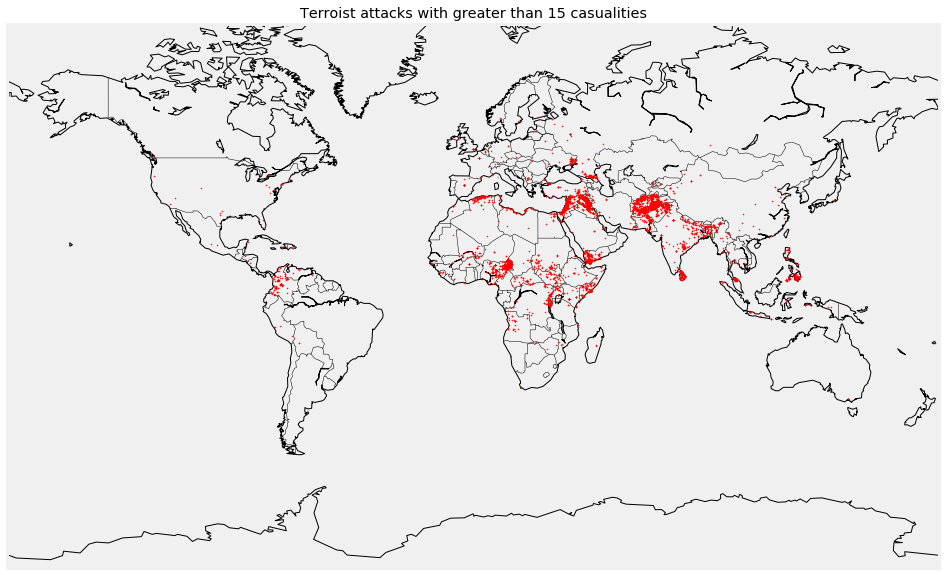

In [18]:
#Use basemap to hospot using latitude and longitude the places with kill and wounded over 15.
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180)
lat_100=list(aleph[aleph['killandwound']>15].latitude)
long_100=list(aleph[aleph['killandwound']>15].longitude)
x_100,y_100=m3(long_100, lat_100)
m3.drawcoastlines()
m3.drawcountries()
m3.plot(x_100, y_100,'go',markersize=0.5,color = 'r')
fig=plt.gcf()
fig.set_size_inches(23,10)
plt.title("Terroist attacks with greater than 15 casualities")

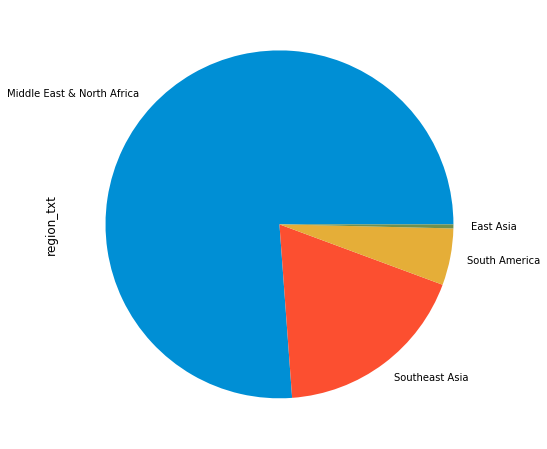

In [19]:
#plot of region pie chart where events happen
fig, ax = plt.subplots() 
fig = plt.gcf()
fig.set_size_inches(8,8)
aleph['region_txt'].value_counts()[::3].plot(ax=ax, kind='pie')

Text(0.5, 0, 'Country')

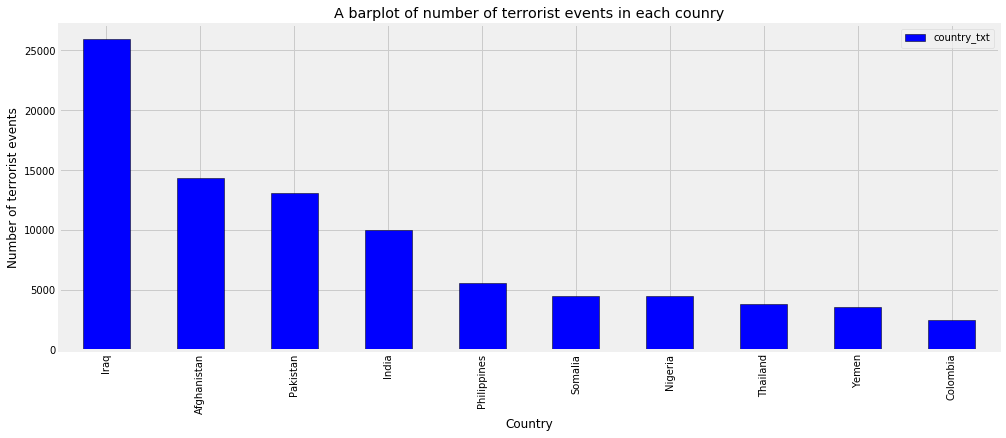

In [20]:
# plot of countries in events throughout the dataframe nb. Iraq most popular!
fig, ax = plt.subplots(figsize=(15,6))
aleph['country_txt'].value_counts()[:10].plot(ax=ax, kind='bar',color='blue',edgecolor='black')
plt.legend()
plt.title('A barplot of number of terrorist events in each counry')
plt.ylabel('Number of terrorist events')
plt.xlabel('Country')


In [21]:
city = aleph.groupby('city')['killandwound'].sum().to_frame().reset_index().sort_values(by='killandwound')

In [22]:
citypie = city.sort_values(by='killandwound', ascending=False)[:5]

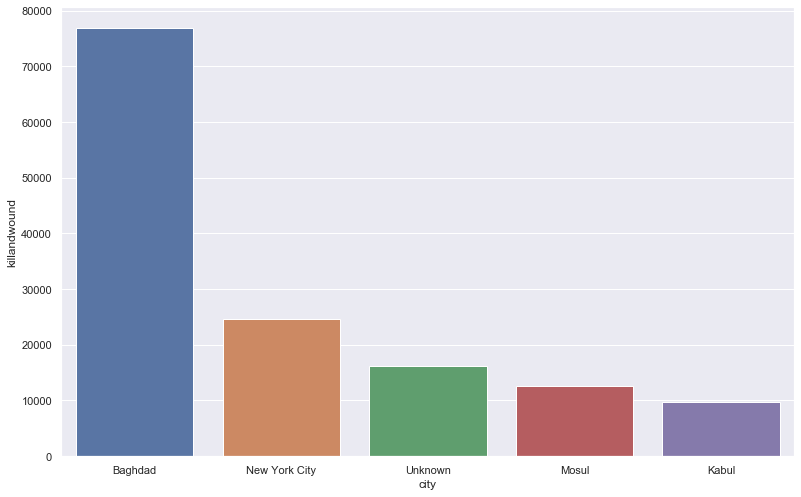

In [23]:
#Use Seaborn to groupby killandwounded to show that New york city had the most killed and wounded.  Obviously makes sense because of 9/11
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x='city',y='killandwound',data=citypie)


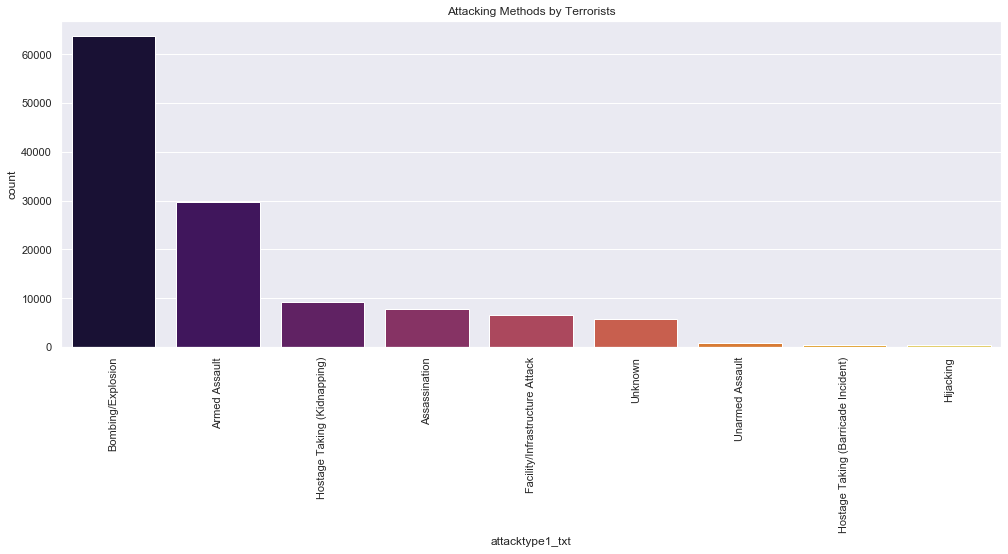

In [24]:
#Using seaborn to plot attack type versus count - nb. explosion , armed assault, then assasination are the top 3
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=aleph,palette='inferno',order=aleph['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

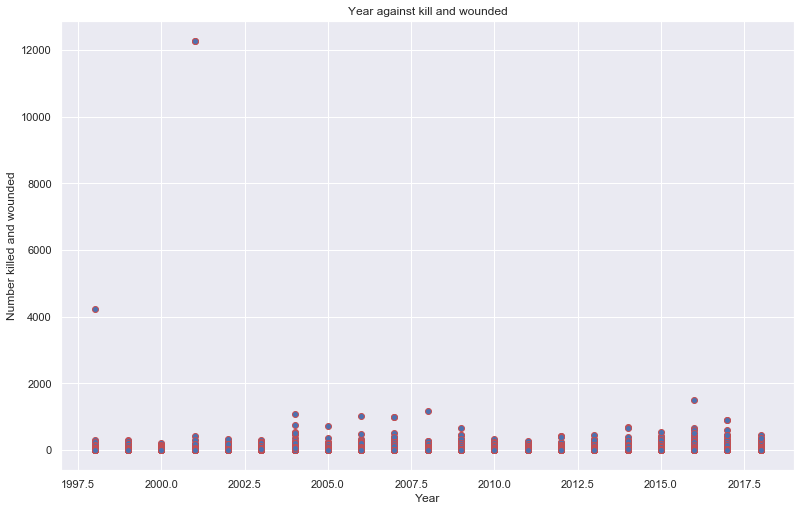

In [25]:
#Most events dont kill and injure over 1000.  
plt.scatter(aleph['iyear'], aleph['killandwound'], edgecolors='r')
plt.xlabel('Year')
plt.ylabel('Number killed and wounded')
plt.title('Year against kill and wounded')
plt.show()

In [26]:
#I used pandas cross tab feature to show the attack type versus the region.

In [27]:
pd.crosstab(aleph['region_txt'],aleph['attacktype1_txt'])

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
region_txt,,,,,,,,,
Australasia & Oceania,13,2,16,59,1,3,5,8,0
Central America & Caribbean,39,29,25,11,1,0,7,0,1
Central Asia,57,34,139,19,2,1,25,4,4
East Asia,51,4,112,22,5,1,2,18,2
Eastern Europe,1140,263,2329,241,5,17,174,63,97
Middle East & North Africa,7647,2381,28767,807,76,78,2545,123,1853
North America,187,56,191,332,6,7,20,62,1
South America,543,194,1475,262,18,11,444,16,101
South Asia,9975,2734,20179,2072,63,136,3325,254,2127


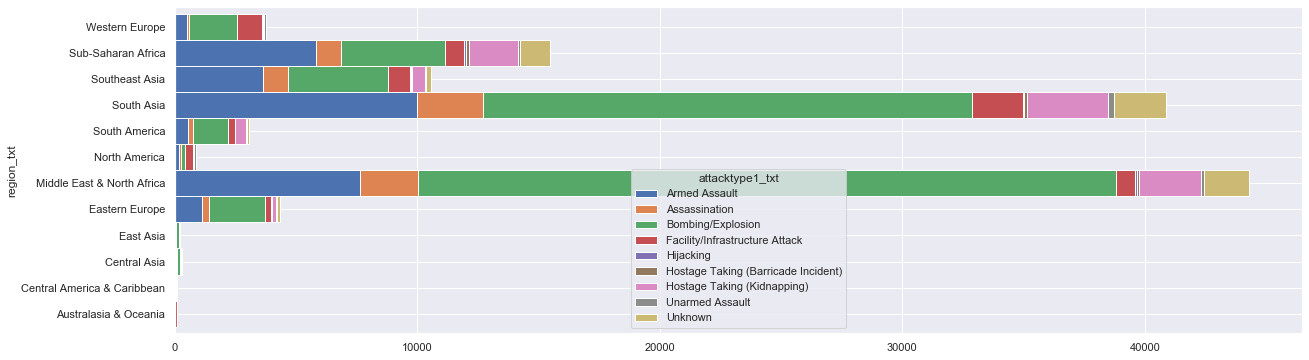

In [28]:
ax = pd.crosstab(aleph['region_txt'],aleph['attacktype1_txt']).plot.barh(stacked = True, width = 1)
fig = plt.gcf()
fig.set_size_inches(18,6)
#ax.grid(True, color = 'black')
ax = sns.set_style("whitegrid")
plt.show()

In [29]:
pd.crosstab(aleph['region_txt'], aleph['targtype1_txt'])


targtype1_txt,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
region_txt,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,0,3,30,3,0,4,15,1,0,1,...,11,11,24,0,0,0,2,1,1,0
Central America & Caribbean,0,1,2,1,0,4,38,17,1,1,...,14,24,4,0,0,0,3,0,1,2
Central Asia,0,1,18,5,0,23,66,10,0,19,...,54,49,7,2,2,2,11,5,4,0
East Asia,0,8,32,5,0,4,31,3,0,10,...,41,47,3,1,0,1,26,4,1,0
Eastern Europe,0,10,315,45,9,70,545,106,0,1086,...,770,758,148,12,14,7,224,103,71,5
Middle East & North Africa,0,121,3172,612,53,356,3548,512,38,8329,...,6101,14319,1125,40,1542,76,821,2258,794,254
North America,52,7,162,47,2,8,87,66,1,23,...,44,179,124,2,1,2,18,8,19,0
South America,0,19,467,25,12,26,320,82,7,343,...,408,631,66,16,6,15,174,62,363,0
South Asia,0,106,2762,1737,52,247,4908,389,21,5510,...,8238,9073,978,305,709,35,1476,2380,756,887


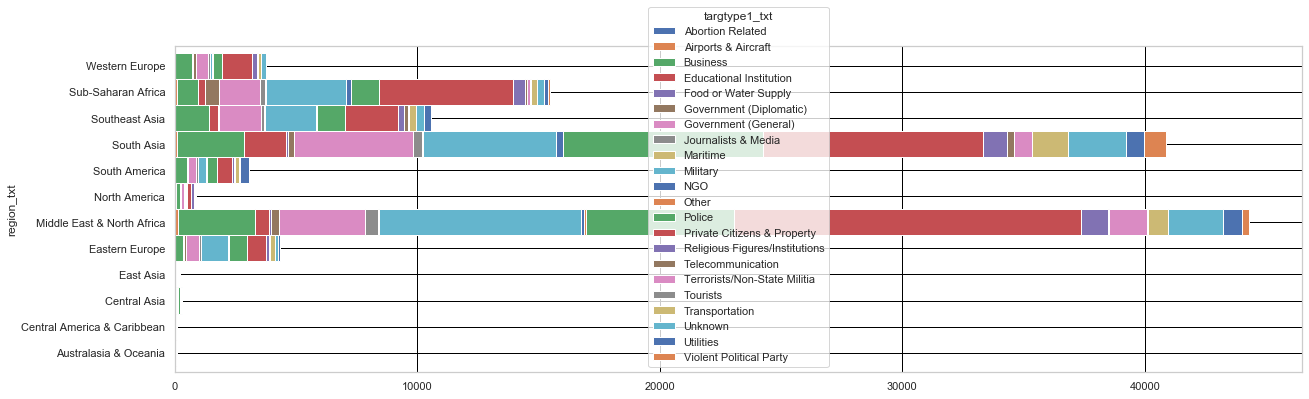

In [30]:
ax = pd.crosstab(aleph['region_txt'],aleph['targtype1_txt']).plot.barh(stacked = True, width = 1)
fig = plt.gcf()
fig.set_size_inches(18,6)
ax.grid(True, color = 'black')
plt.show()

In [31]:
aleph.groupby(['targtype1_txt'])['property'].sum().sort_values(ascending = False).reset_index()

,targtype1_txt,property
0,Utilities,1022
1,Telecommunication,339
2,Abortion Related,39
3,Food or Water Supply,-1
4,Maritime,-204
5,Tourists,-208
6,Other,-224
7,Airports & Aircraft,-515
8,NGO,-689
9,Transportation,-899


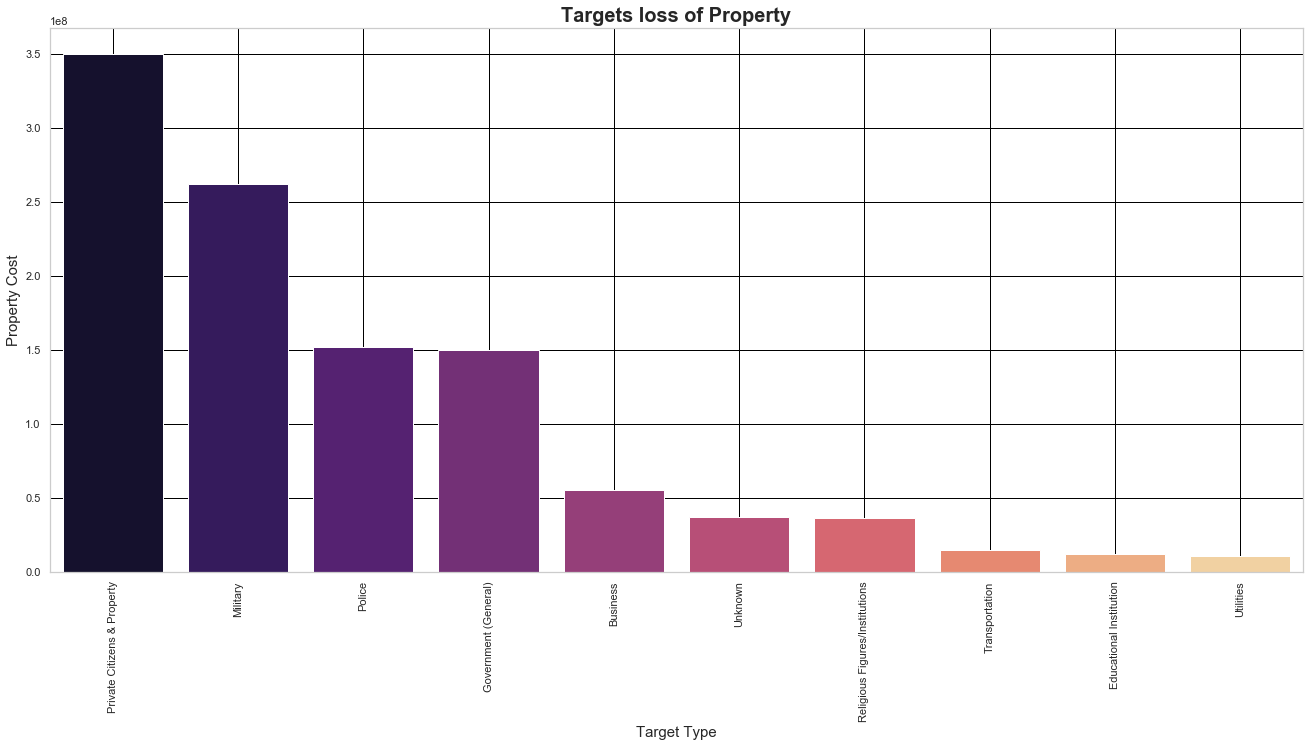

In [32]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y = aleph.groupby(['targtype1_txt'])['propvalue'].sum().sort_values(ascending = False).reset_index()['propvalue'],
                 x = pd.Series(aleph['targtype1_txt'].value_counts().iloc[:10].index), palette='magma', label = True)
plt.xticks(rotation = 90)
ax.set_xlabel('Target Type', fontdict = {'size':15})
ax.set_ylabel('Property Cost', fontdict = {'size':15})
ax.set_title('Targets loss of Property', fontdict = {'size':20, 'weight':'bold'})
ax.grid(True, color = 'black')

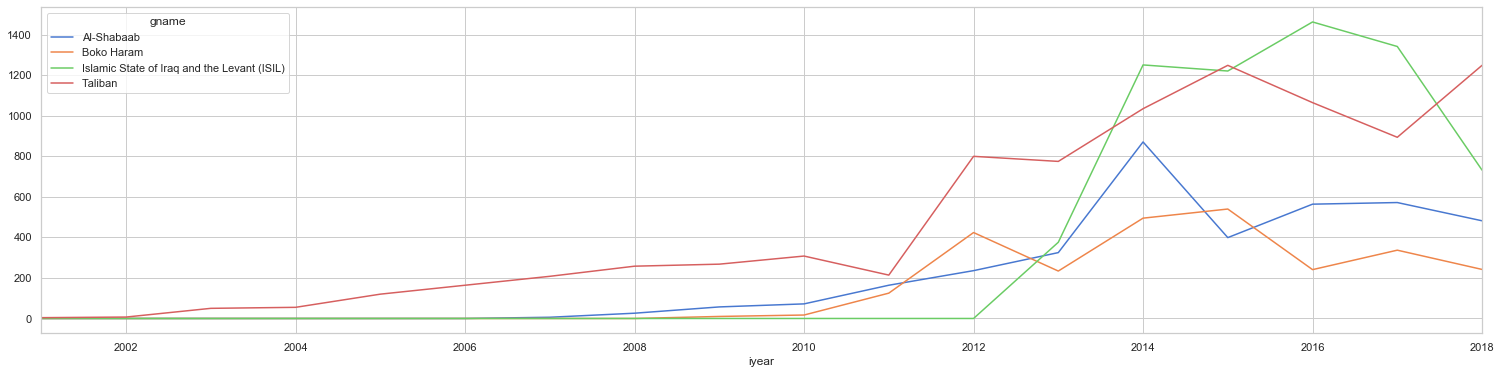

In [33]:
#top groups 
pd.crosstab(aleph[aleph['gname'].isin(aleph['gname'].value_counts()[1:5].index)]['iyear'],aleph[aleph['gname'].isin(aleph['gname'].value_counts()[1:5].index)]['gname']).plot(color=sns.color_palette('muted',10),figsize=(23,6))

In [34]:
talibanfilter = aleph.loc[aleph['gname'] == 'Taliban']

In [35]:
alqaedafilter = aleph.loc[aleph['gname'] == 'Al Qaeda']

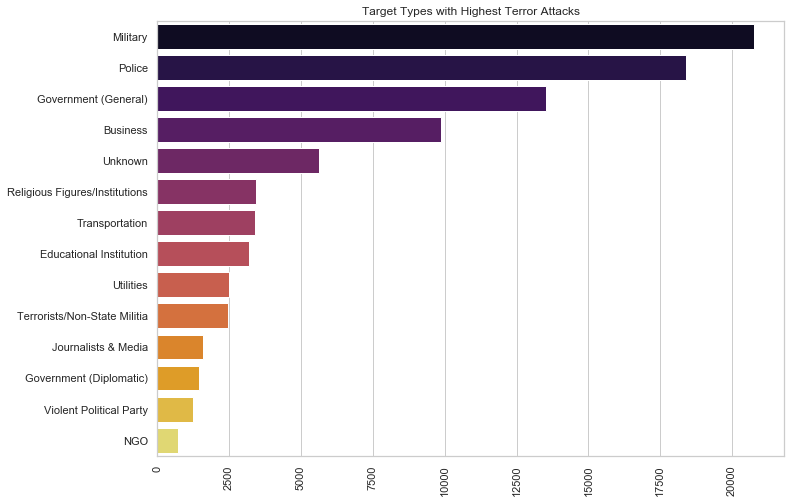

In [36]:
# seaborn plot of terrorist groups with highest terror attacks - taliban are number 1 (afghanistan) followed by a group in iraq
sns.barplot(aleph['targtype1_txt'].value_counts()[1:15].values,aleph['targtype1_txt'].value_counts()[1:15].index,palette='inferno')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Target Types with Highest Terror Attacks')
plt.show()

Text(0.5, 1, 'aleph.corr()')

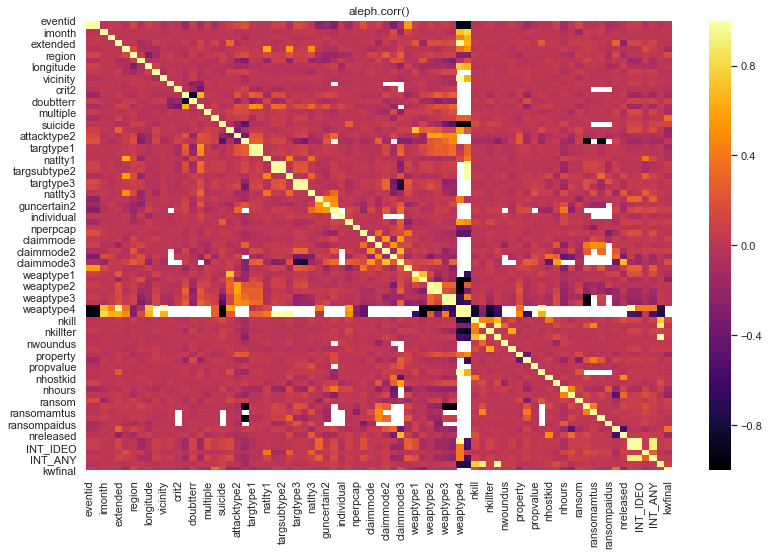

In [37]:
sns.heatmap(aleph.corr(),cmap='inferno')
plt.title('aleph.corr()')

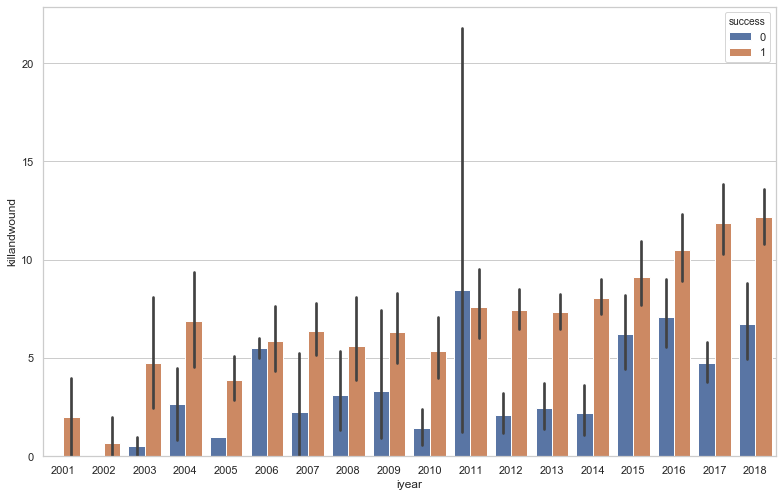

In [38]:
sns.barplot(x='iyear', y="killandwound", hue="success",data=talibanfilter, palette="deep")
sns.set(rc={'figure.figsize':(11.7,8.27)})

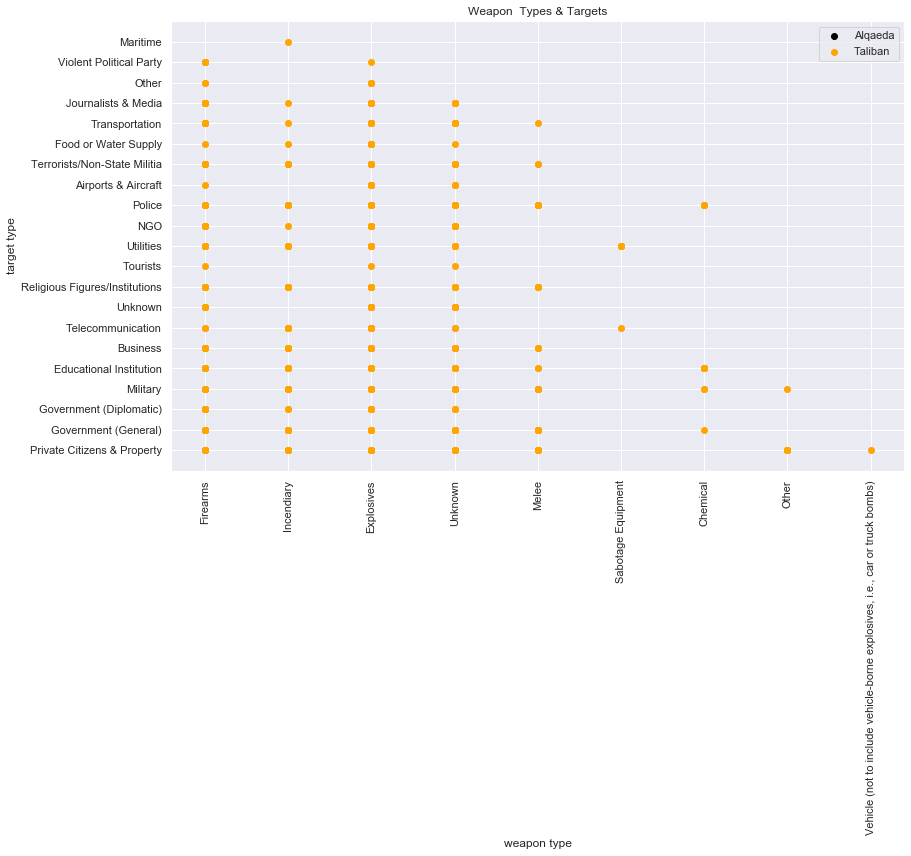

In [39]:
plt.scatter(alqaedafilter.weaptype1_txt, alqaedafilter.targtype1_txt, color="black", label="Alqaeda")
plt.scatter(talibanfilter.weaptype1_txt, talibanfilter.targtype1_txt, color="orange", label="Taliban")
plt.xticks(rotation=90)
plt.xlabel("weapon type")
plt.ylabel("target type")
plt.title("Weapon  Types & Targets")
plt.legend()
plt.show()

In [40]:
from wordcloud import WordCloud

In [41]:
aleph = aleph[aleph['gname']!='Unknown']

In [42]:
aleph = aleph[aleph['motive'].duplicated(keep = False)].sort_values('motive')

In [43]:
aleph = aleph.drop_duplicates('motive')

In [44]:
alqaedafilter = aleph.loc[aleph['gname'] == 'Al-Qaida']

In [45]:
talibanfilter = aleph.loc[aleph['gname'] == 'Taliban']

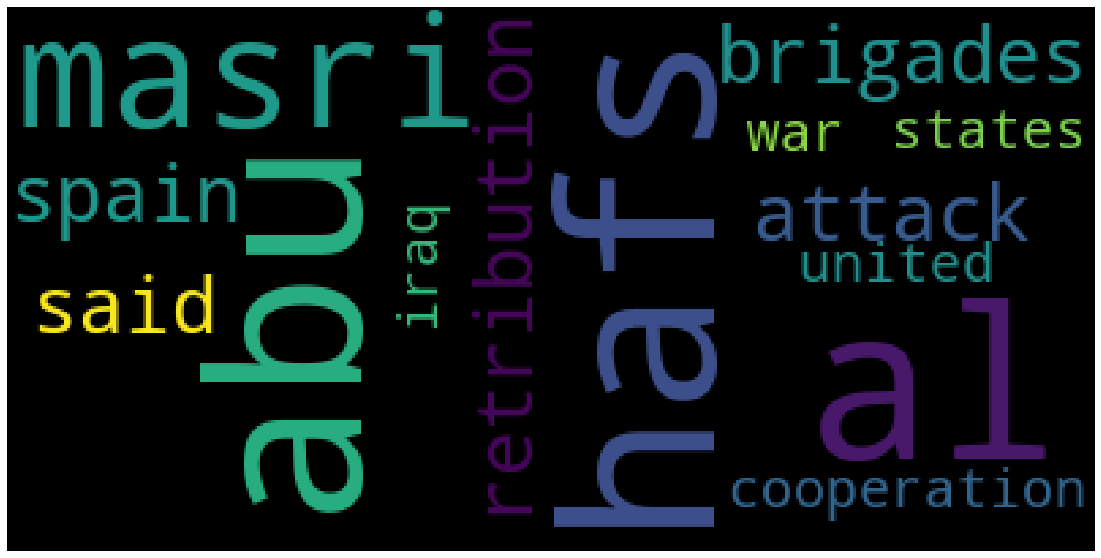

In [46]:
motive = alqaedafilter['motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
wordcloud = WordCloud().generate(motive)
plt.subplots(figsize=(23,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

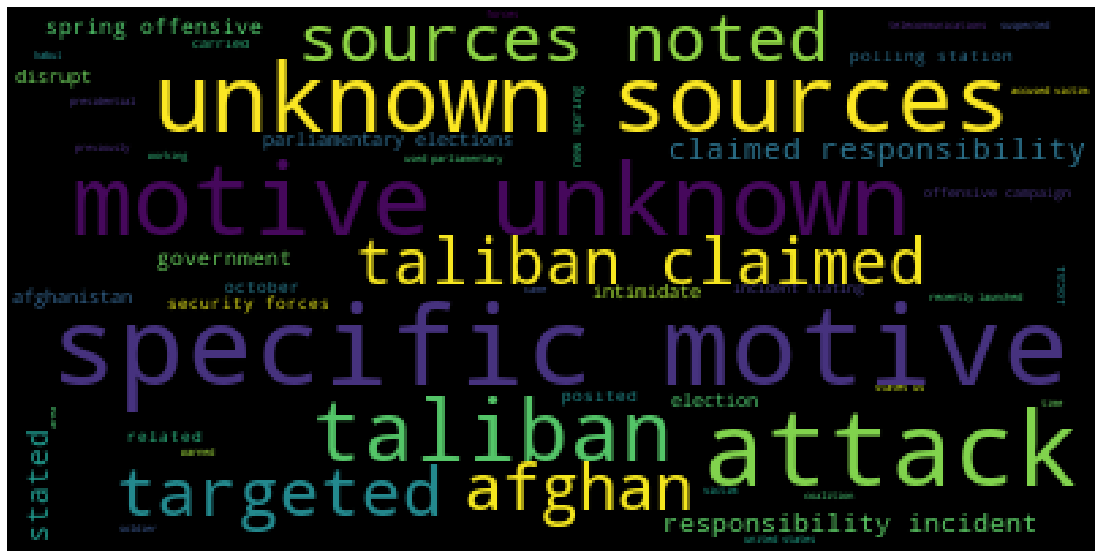

In [47]:
motive = talibanfilter['motive'].str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
wordcloud = WordCloud().generate(motive)
plt.subplots(figsize=(23,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [48]:
property = aleph.groupby('gname')['propvalue'].sum().to_frame().reset_index().sort_values(by='propvalue')

In [49]:
property1 = property.sort_values(by='propvalue', ascending=False)[:5]

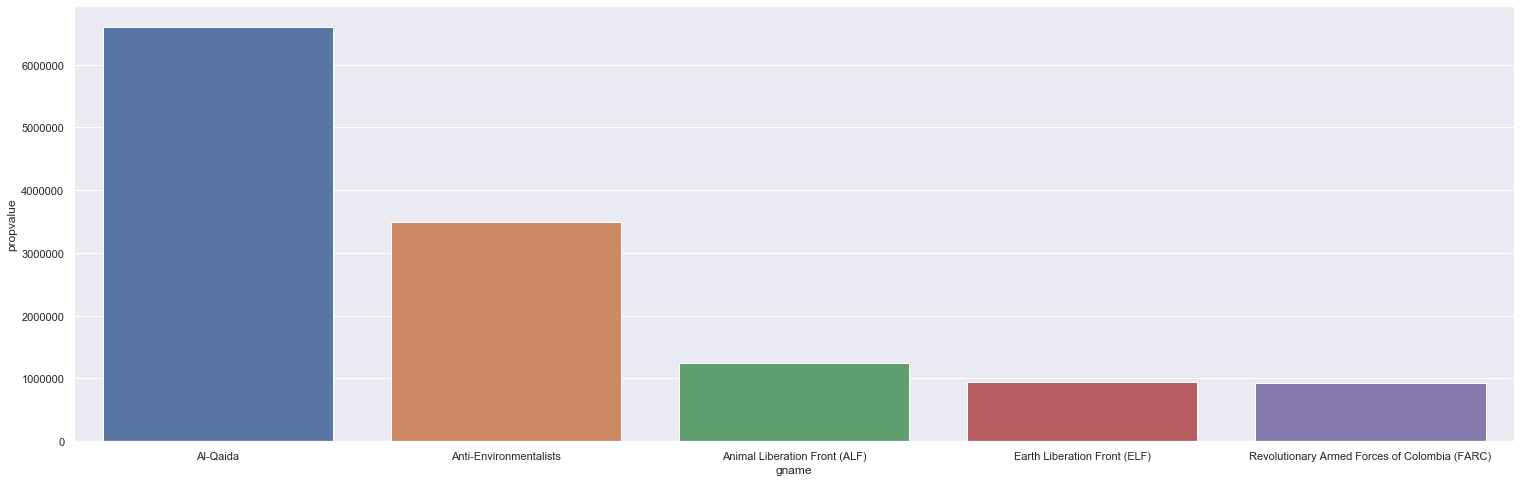

In [50]:
sns.set(rc={'figure.figsize':(23,8)})
sns.barplot(x='gname',y='propvalue',data=property1)

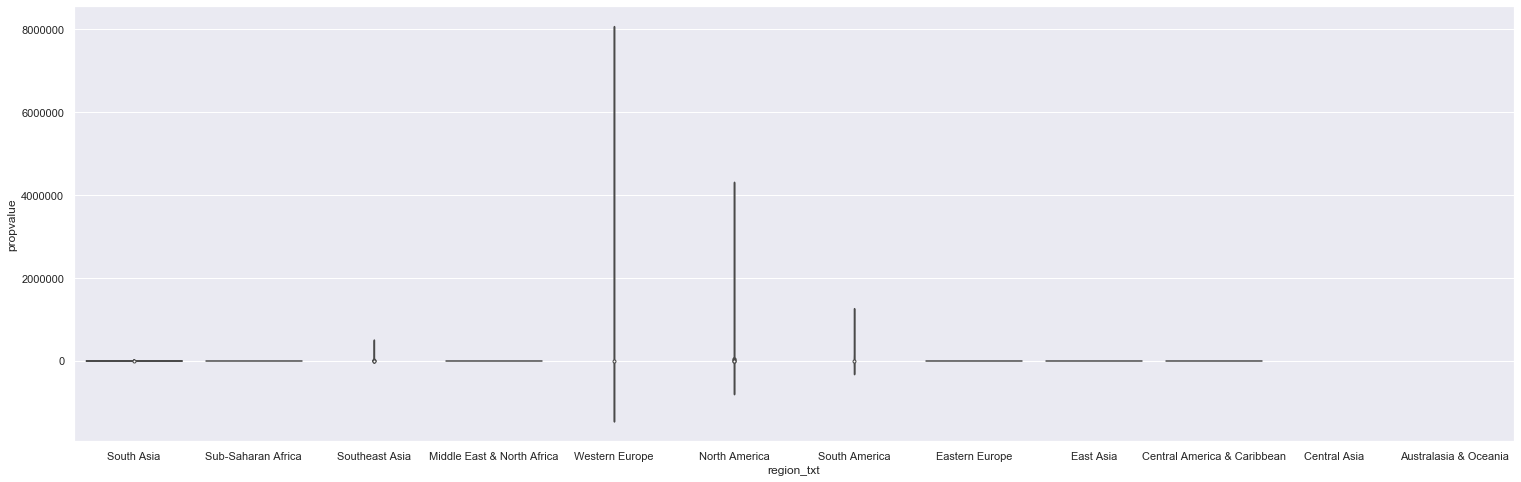

In [51]:
sns.violinplot(x="region_txt", y="propvalue", data=aleph,palette='rainbow')

In [52]:
aleph['ransomdiff']=aleph['ransomamt']-aleph['ransompaid']


In [53]:
ransom = aleph.groupby('gname')['ransomdiff'].sum().to_frame().reset_index().sort_values(by='ransomdiff')

In [54]:
ransom1 = ransom.sort_values(by='ransomdiff', ascending=True)[::-5]

In [55]:
print('Highest ransom amount: ',aleph['ransomamt'].max(),'GROUP',aleph.loc[aleph['ransomamt'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['ransomamt'].idxmax()].iyear,aleph.loc[aleph['ransomamt'].idxmax()].imonth)
print('Lowest ransom amount: ',aleph['ransomamt'].min(),'GROUP',aleph.loc[aleph['ransomamt'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['ransomamt'].idxmin()].iyear,aleph.loc[aleph['ransomamt'].idxmin()].imonth)

Highest ransom amount:  13000000.0 GROUP Revolutionary Armed Forces of Colombia (FARC) Year/Month: 2000 7
Lowest ransom amount:  -99.0 GROUP Albanian extremists Year/Month: 2001 7


In [56]:
print('Highest ransom paid: ',aleph['ransompaid'].max(),'GROUP',aleph.loc[aleph['ransompaid'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['ransompaid'].idxmax()].iyear,aleph.loc[aleph['ransompaid'].idxmax()].imonth)
print('Lowest ransom paid: ',aleph['ransompaid'].min(),'GROUP',aleph.loc[aleph['ransompaid'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['ransompaid'].idxmin()].iyear,aleph.loc[aleph['ransompaid'].idxmin()].imonth)


Highest ransom paid:  1700000.0 GROUP Salafist Group for Preaching and Fighting (GSPC) Year/Month: 2003 2
Lowest ransom paid:  -99.0 GROUP Albanian extremists Year/Month: 2001 7


In [57]:
print('Highest ransom difference: ',aleph['ransomdiff'].max(),'GROUP',aleph.loc[aleph['ransomdiff'].idxmax()].gname,'Year/Month:',aleph.loc[aleph['ransomdiff'].idxmax()].iyear,aleph.loc[aleph['ransomdiff'].idxmax()].imonth)
print('Lowest ransom paid: ',aleph['ransompaid'].min(),'GROUP',aleph.loc[aleph['ransompaid'].idxmin()].gname,'Year/Month:',aleph.loc[aleph['ransompaid'].idxmin()].iyear,aleph.loc[aleph['ransompaid'].idxmin()].imonth)


Highest ransom difference:  13000099.0 GROUP Revolutionary Armed Forces of Colombia (FARC) Year/Month: 2000 7
Lowest ransom paid:  -99.0 GROUP Albanian extremists Year/Month: 2001 7


In [58]:
aleph = aleph[~aleph['ransomamt'].isnull()]


# final conversion now worked
aleph[['ransomamt']] = aleph[['ransomamt']].astype(int)

In [59]:
aleph = aleph[~aleph['ransompaid'].isnull()]


# final conversion now worked
aleph[['ransompaid']] = aleph[['ransompaid']].astype(int)

In [60]:
aleph = aleph[~aleph['ransomdiff'].isnull()]


# final conversion now worked
aleph[['ransomdiff']] = aleph[['ransomdiff']].astype(int)

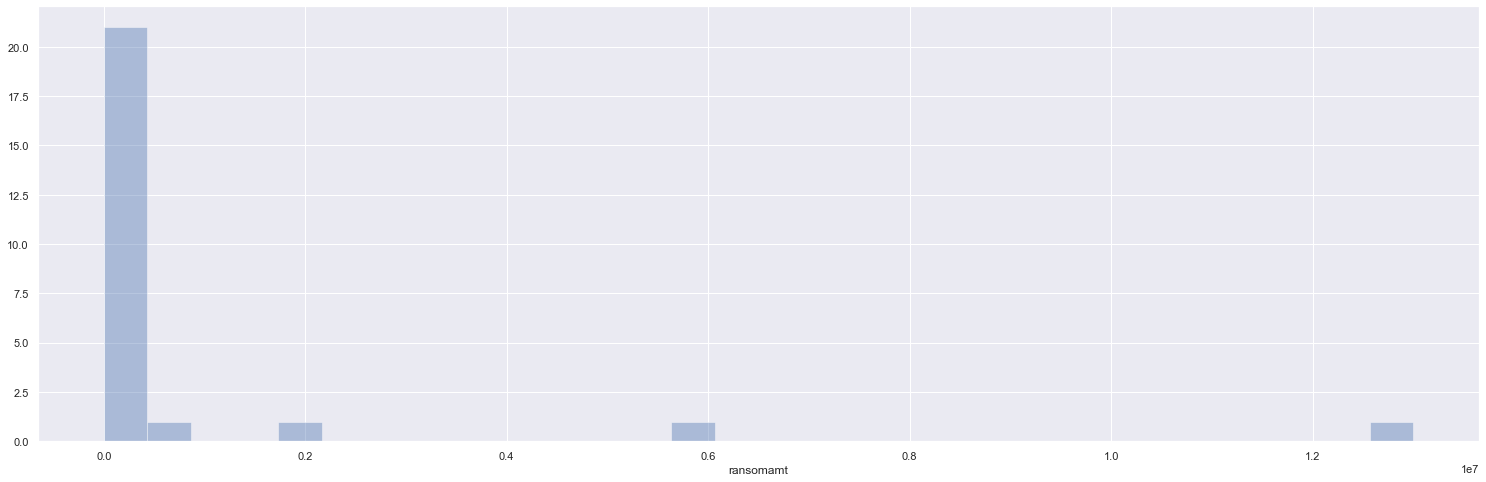

In [61]:
sns.distplot(aleph['ransomamt'],kde=False,bins=30)


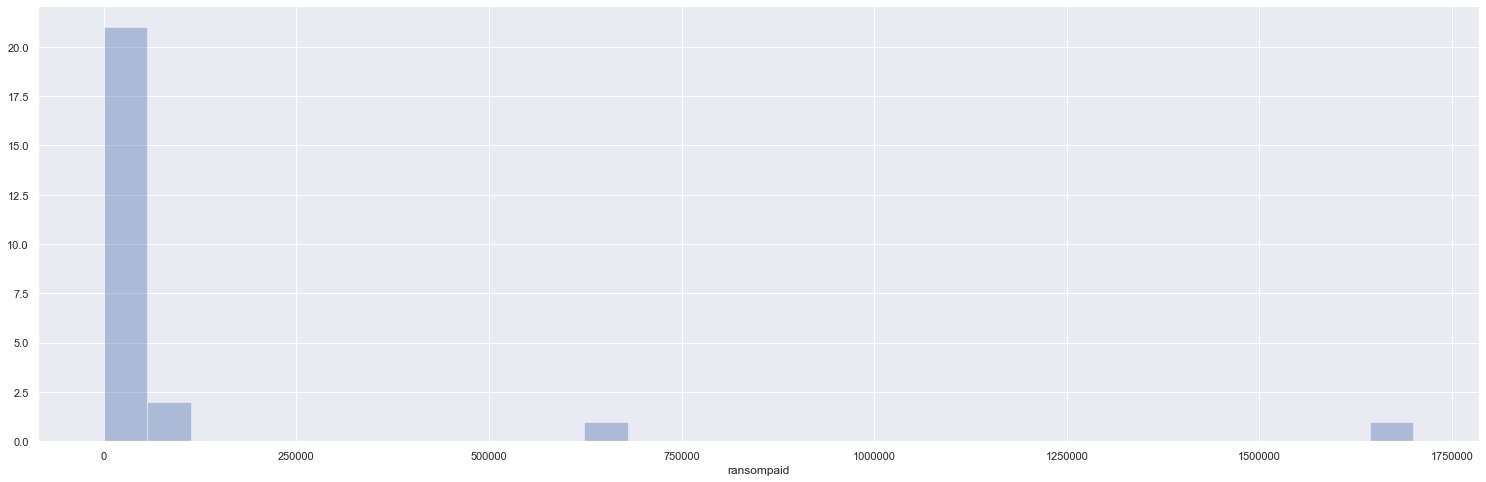

In [62]:
sns.distplot(aleph['ransompaid'],kde=False,bins=30)

ax = pd.crosstab(aleph['ransomamt'],aleph['region_txt']).plot.barh(stacked = True, width = 1)
fig = plt.gcf()
fig.set_size_inches(18,6)
#ax.grid(True, color = 'black')
ax = sns.set_style("whitegrid")
plt.show()

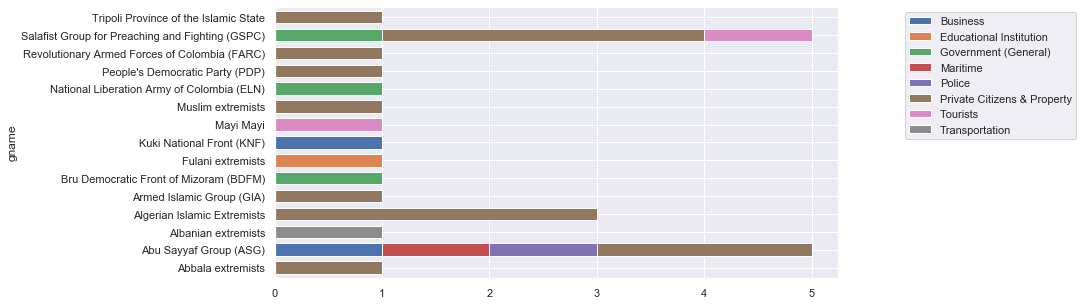

In [63]:
aleph=aleph[aleph['targtype1_txt'].isin(aleph['targtype1_txt'].value_counts()[0:10].index)]
pd.crosstab(aleph['gname'],aleph['targtype1_txt']).plot.barh(stacked=True,figsize=(9,5),width=0.7)
plt.legend(loc=9,bbox_to_anchor=(1.27,1))

# Data science on the dataset

In [64]:
features = ['latitude', 'longitude','vicinity','doubtterr',
                'success','suicide','claimed','property','ishostkid','country_txt',
                'region','attacktype1_txt','targtype1_txt',
                'weaptype1_txt']

In [65]:
target = 'killandwound'

In [66]:
# Prediction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

# Classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Data encoding from string to dummy
from sklearn.preprocessing import LabelEncoder

In [67]:
lb = LabelEncoder()
alephcopy['country_txt'] = lb.fit_transform(alephcopy['country_txt'])
alephcopy['attacktype1_txt'] = lb.fit_transform(alephcopy['attacktype1_txt'])
alephcopy['targtype1_txt'] = lb.fit_transform(alephcopy['targtype1_txt'])
alephcopy['weaptype1_txt'] = lb.fit_transform(alephcopy['weaptype1_txt'])

# Define X and Y.
X = alephcopy[features].fillna(0)
y = alephcopy['kwfinal']


In [68]:
#split the data into training set (30%) and test set(70%) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


# Decision Tree Classifier

In [69]:
dtree = DecisionTreeClassifier()

In [70]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
dtpredictions = dtree.predict(X_test)

In [72]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [73]:
print(accuracy_score(y_test,dtpredictions))

0.8088788300835654


# Random Forest Classifier

In [74]:
rfc = RandomForestClassifier(n_estimators=600)

In [75]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
#Fit the data
rfcpredictions = rfc.predict(X_test)

In [77]:
#Print the accuracy score - comparing the predictions to the y test data
print(accuracy_score(y_test,rfcpredictions))

0.8365947075208914


In [78]:
#Rank the feature importances
feature_importances = pd.Series(rfc.feature_importances_,X.columns[::])
print(feature_importances)

latitude           0.184908
longitude          0.190198
vicinity           0.009376
doubtterr          0.024150
success            0.072533
suicide            0.017121
claimed            0.013529
property           0.053478
ishostkid          0.010288
country_txt        0.060374
region             0.041580
attacktype1_txt    0.121966
targtype1_txt      0.141994
weaptype1_txt      0.058504
dtype: float64


In [79]:
newfi = feature_importances.sort_values(ascending=False)

In [80]:
newfi

longitude          0.190198
latitude           0.184908
targtype1_txt      0.141994
attacktype1_txt    0.121966
success            0.072533
country_txt        0.060374
weaptype1_txt      0.058504
property           0.053478
region             0.041580
doubtterr          0.024150
suicide            0.017121
claimed            0.013529
ishostkid          0.010288
vicinity           0.009376
dtype: float64

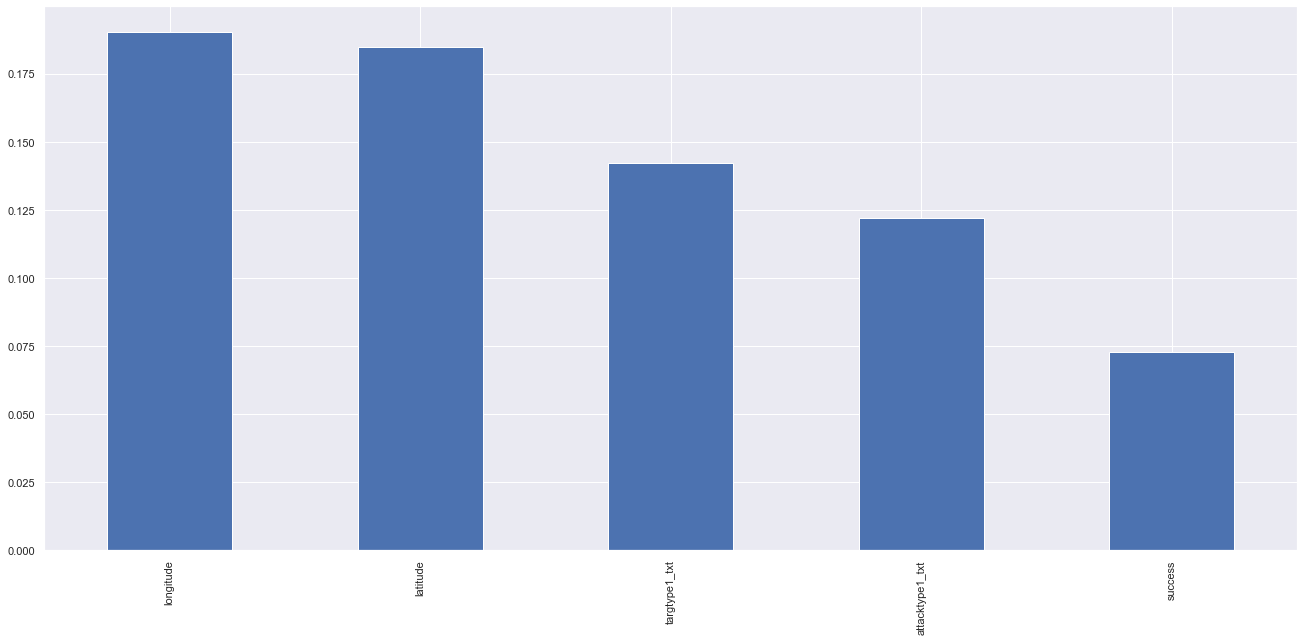

In [81]:
newfi[0:5].plot.bar(figsize=(20,10)) 
plt.show()

In [82]:
#Scatterplot plotting year against number of hostages taken

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


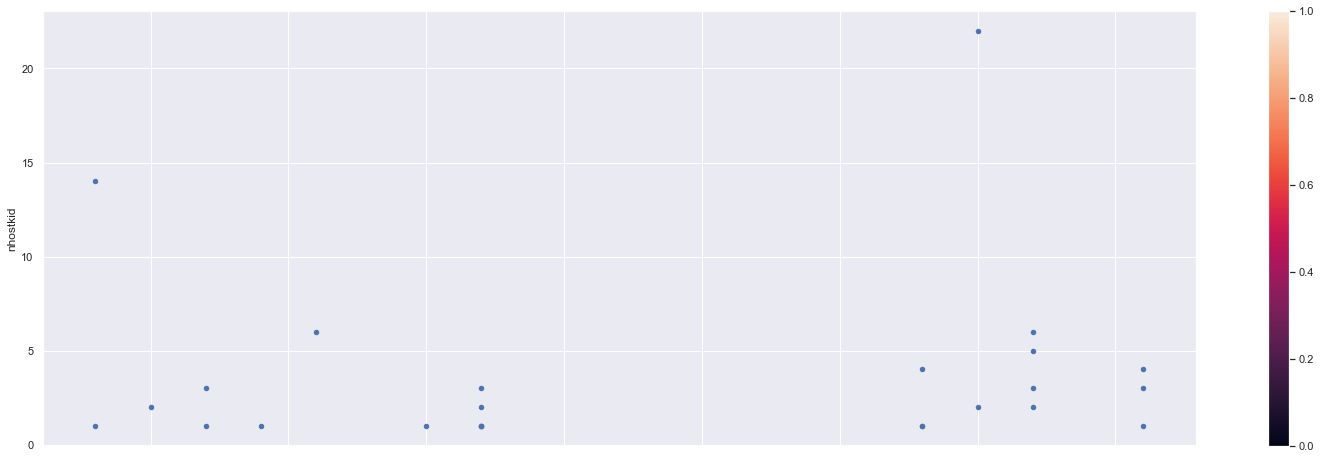

In [83]:
aleph.plot.scatter(x='iyear',y='nhostkid',cmap='coolwarm')

In [84]:
#Hexbin plot to show year against number of hostages taken

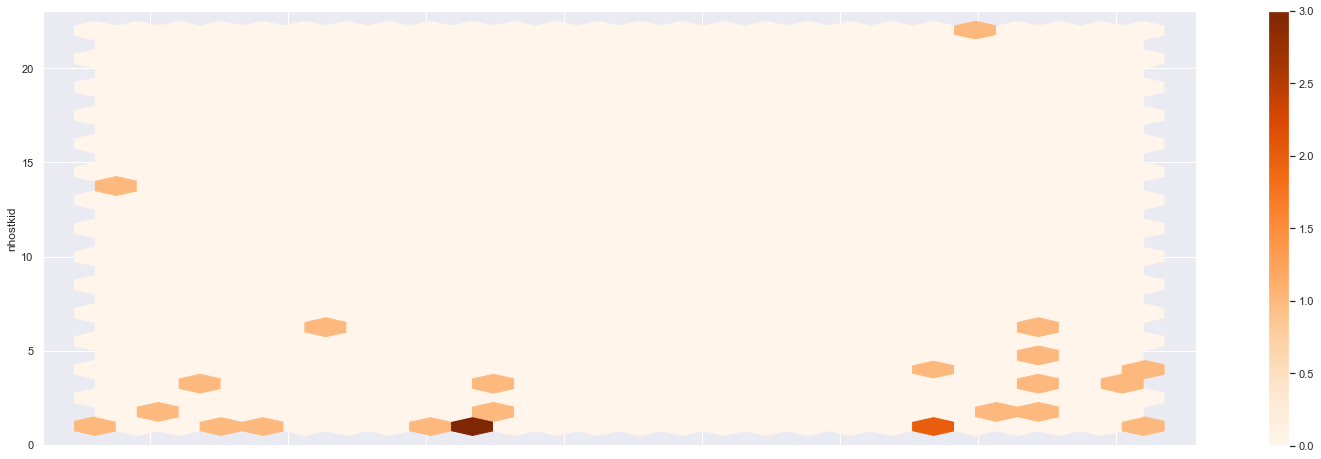

In [85]:
aleph.plot.hexbin(x='iyear',y='nhostkid',gridsize=25,cmap='Oranges')


In [86]:
#Kernal density estimation for number of hostages taken

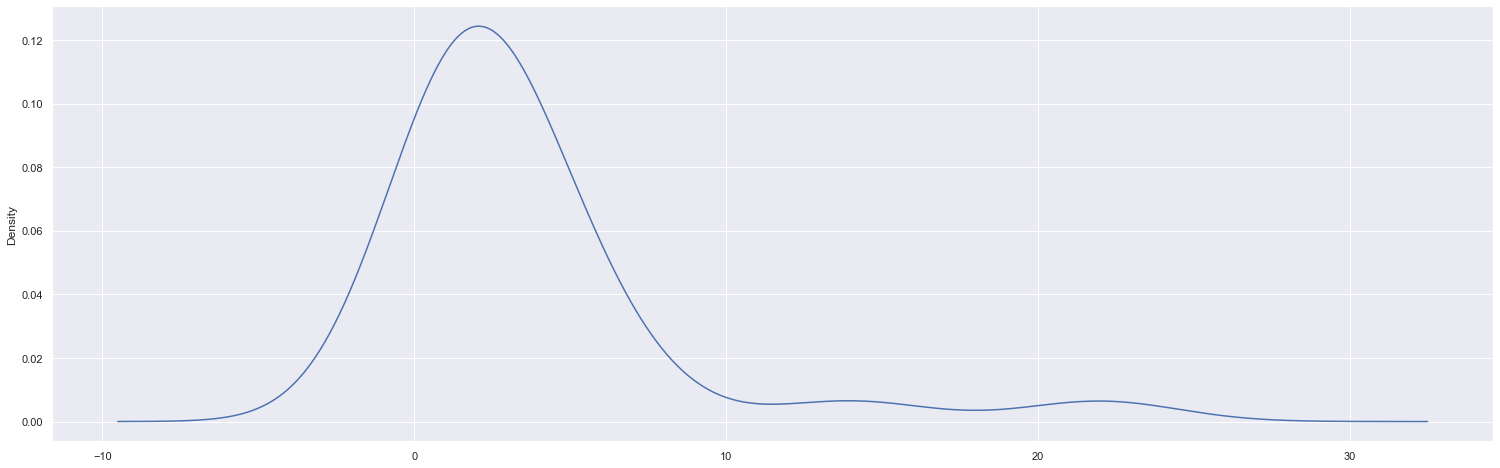

In [87]:
aleph['nhostkid'].plot.kde()

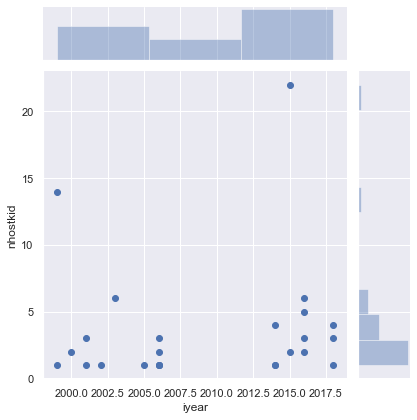

In [88]:
sns.jointplot(x='iyear',y='nhostkid',data=aleph)

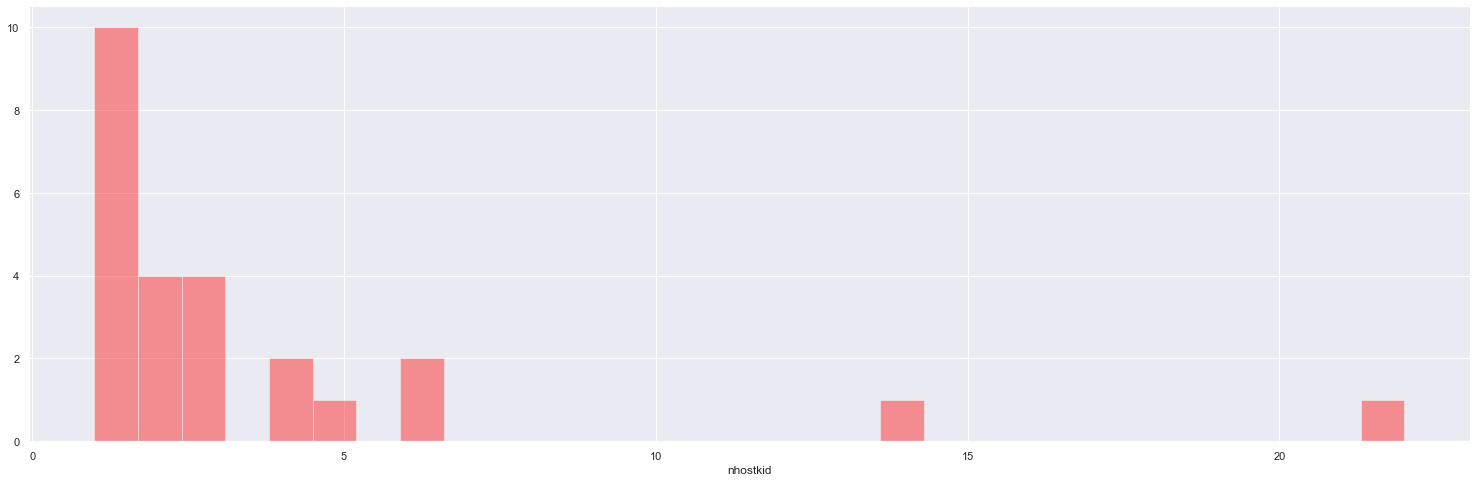

In [89]:
sns.distplot(aleph['nhostkid'],bins=30,kde=False,color='red')

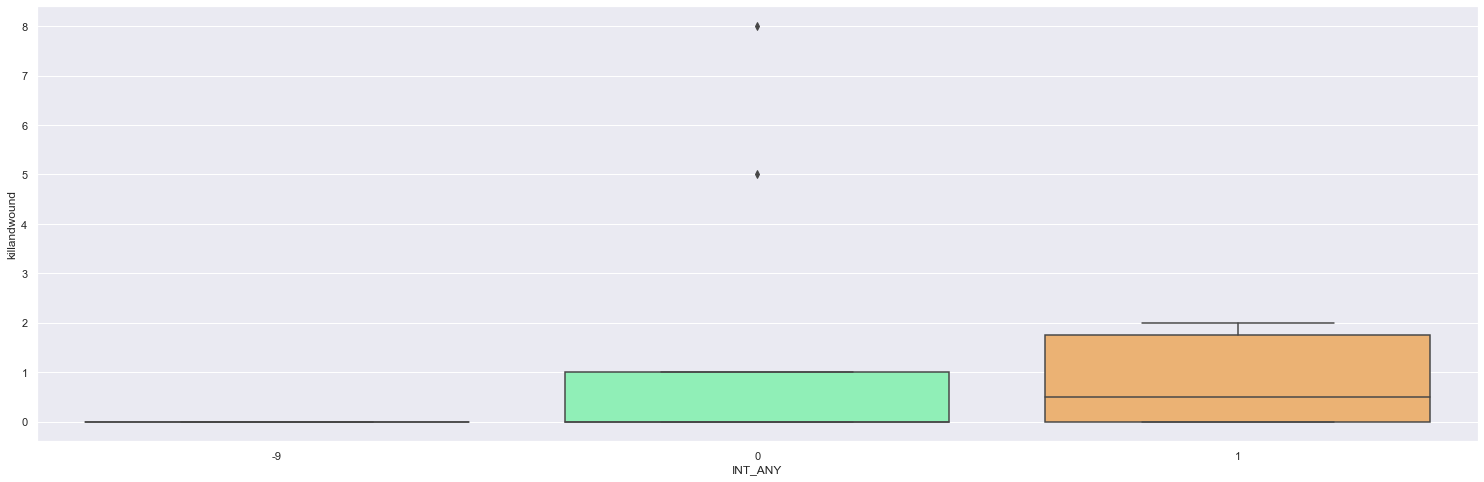

In [90]:
sns.boxplot(x='INT_ANY',y='killandwound',data=aleph,palette='rainbow')

C:\Users\marcu\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning:

invalid value encountered in less

C:\Users\marcu\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning:

invalid value encountered in greater



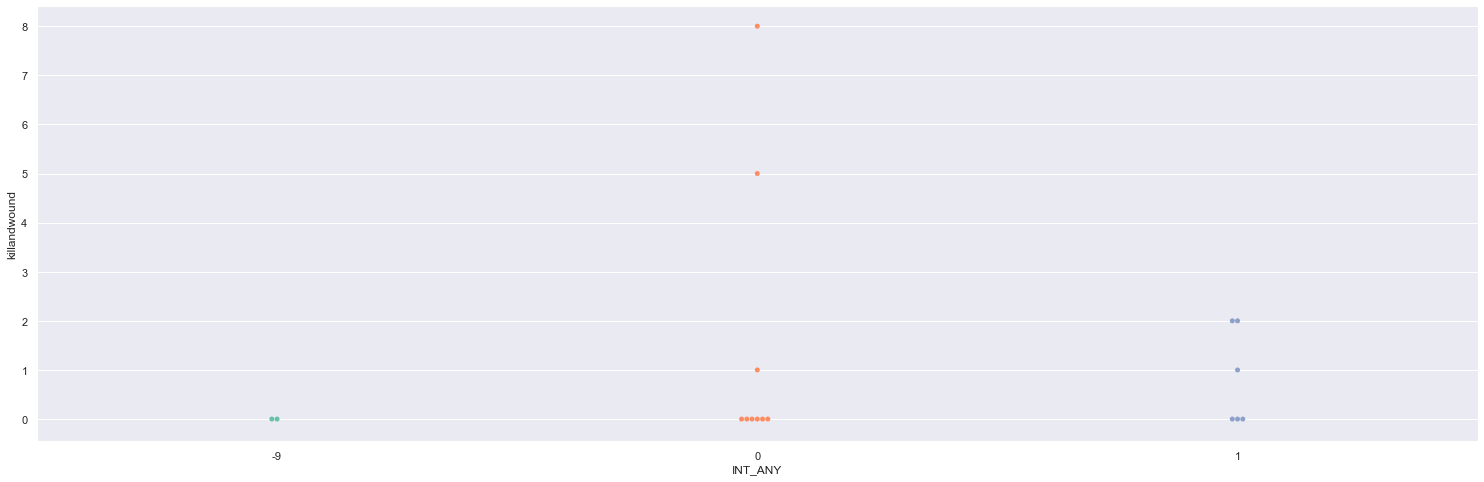

In [91]:
sns.swarmplot(x='INT_ANY',y='killandwound',data=aleph,palette='Set2')

Text(0.5, 1, 'aleph.corr()')

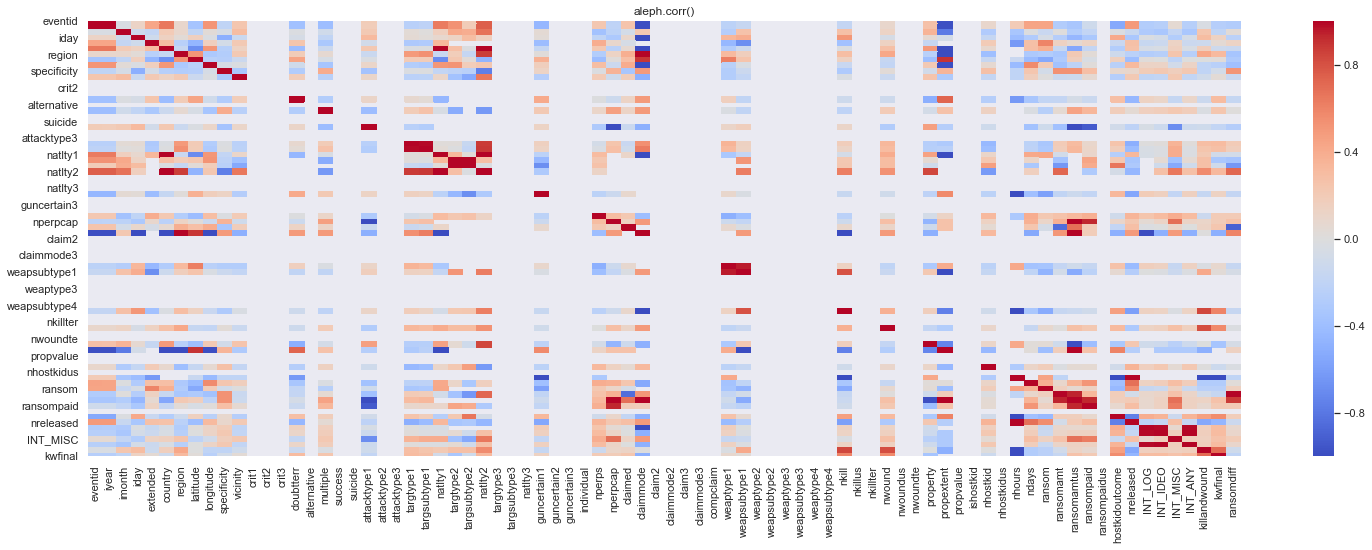

In [92]:
sns.heatmap(aleph.corr(),cmap='coolwarm')
plt.title('aleph.corr()')

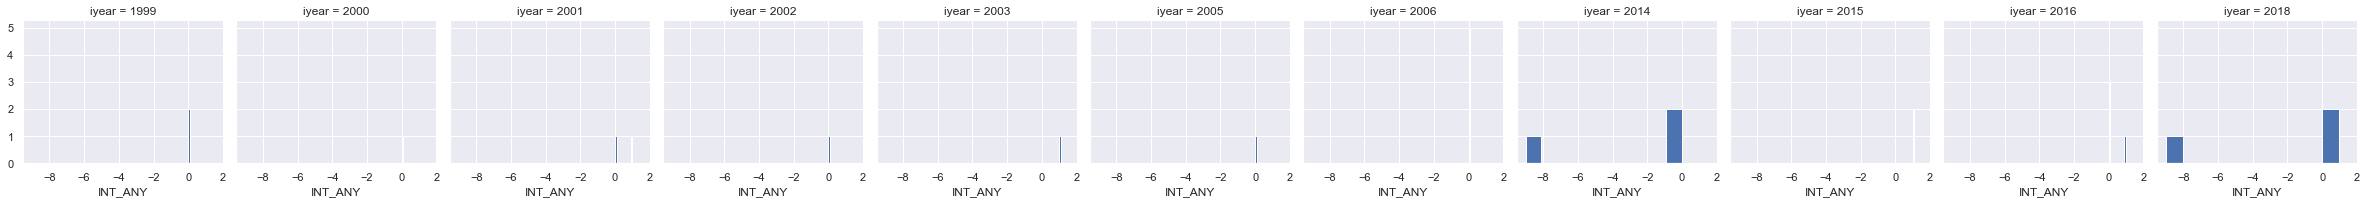

In [93]:
g = sns.FacetGrid(data=aleph,col='iyear')
g.map(plt.hist,'INT_ANY')

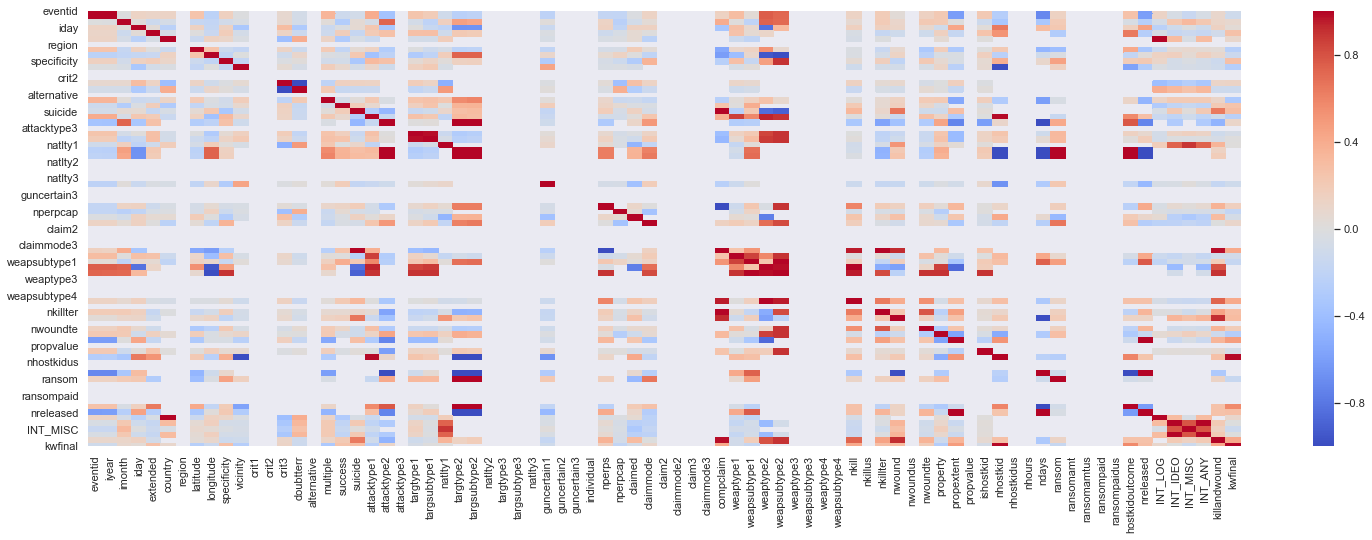

In [94]:
sns.heatmap(talibanfilter.corr(),cmap='coolwarm')

In [95]:
alephcopy.pivot_table(values='nkill',index='imonth',columns='iyear')

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
imonth,,,,,,,,,,,,,,,,,,,,,
0,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,3.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.085714,0.171429,1.322581,1.052632,0.625000,0.869565,1.111111,0.520000,0.326667,0.964912,...,2.138958,1.550360,1.803483,2.425978,1.770732,1.756549,2.413074,2.590622,2.733890,1.973006
2,1.037037,0.323529,1.379310,1.058824,0.789474,0.519231,0.763636,0.296296,0.575540,1.061611,...,1.635821,1.766423,1.292553,1.924214,1.905882,2.014318,2.413149,2.851449,2.484375,1.754745
3,0.101449,0.047619,0.971429,0.674419,0.527273,1.270833,0.580000,0.310000,0.741667,0.802139,...,1.380488,1.586957,1.600897,2.239683,1.759236,2.029619,2.599467,2.333641,2.737017,2.120956
4,0.519481,0.307692,0.736842,0.365854,1.250000,1.617021,0.594203,0.517241,0.698113,0.717647,...,1.911058,1.736695,1.359447,1.705966,1.500517,2.322095,3.101245,2.864455,2.590909,2.460746
5,0.086957,0.166667,1.189655,0.733333,2.285714,0.382979,0.780220,0.514706,0.336364,1.080745,...,1.836145,1.770563,1.714922,1.616587,2.004673,2.792888,2.885901,2.443567,2.868421,2.963470
6,0.392157,0.043478,3.393939,1.250000,0.847826,0.565217,1.012987,0.155039,0.817204,0.827434,...,2.116550,1.377660,1.892231,2.094164,2.277512,4.939815,3.488309,3.098330,2.470936,2.843750
7,0.109375,0.157895,1.375000,0.642857,0.482759,0.714286,0.791667,0.149123,0.421875,0.925926,...,2.525862,2.311436,1.663212,1.907967,1.944688,2.843652,3.332777,2.745318,2.347734,2.783251
8,0.333333,0.304348,0.804348,0.870968,0.935484,1.016949,0.848485,0.123967,6.941860,1.272727,...,2.562500,1.894866,2.026393,1.787234,2.217047,3.810236,2.683225,2.440617,2.354555,2.791667


In [96]:
pd = alephcopy.pivot_table(values='nkill',index='imonth',columns='iyear')

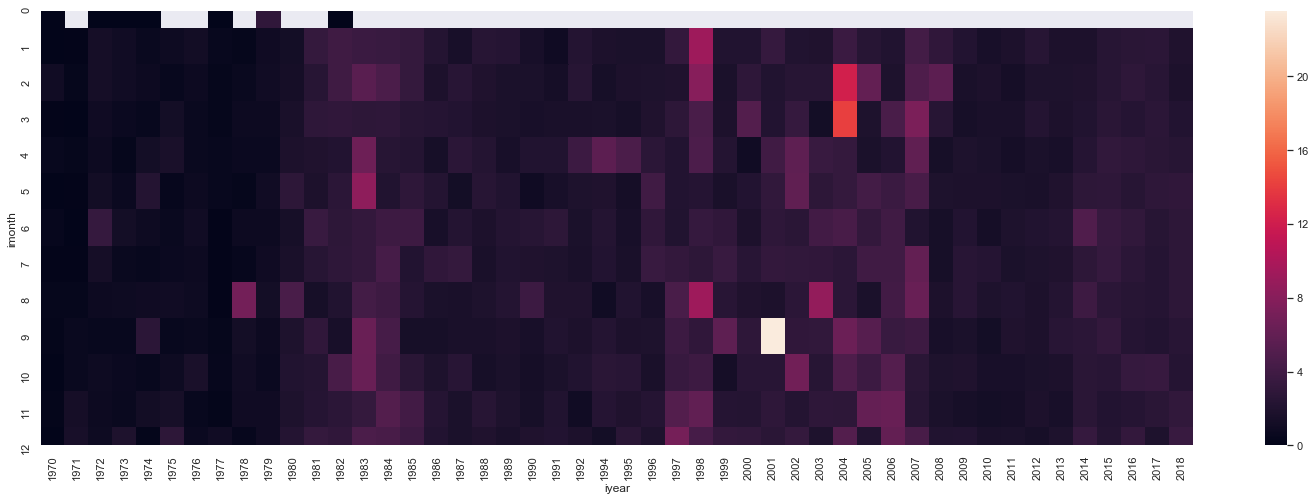

In [97]:
sns.heatmap(pd)

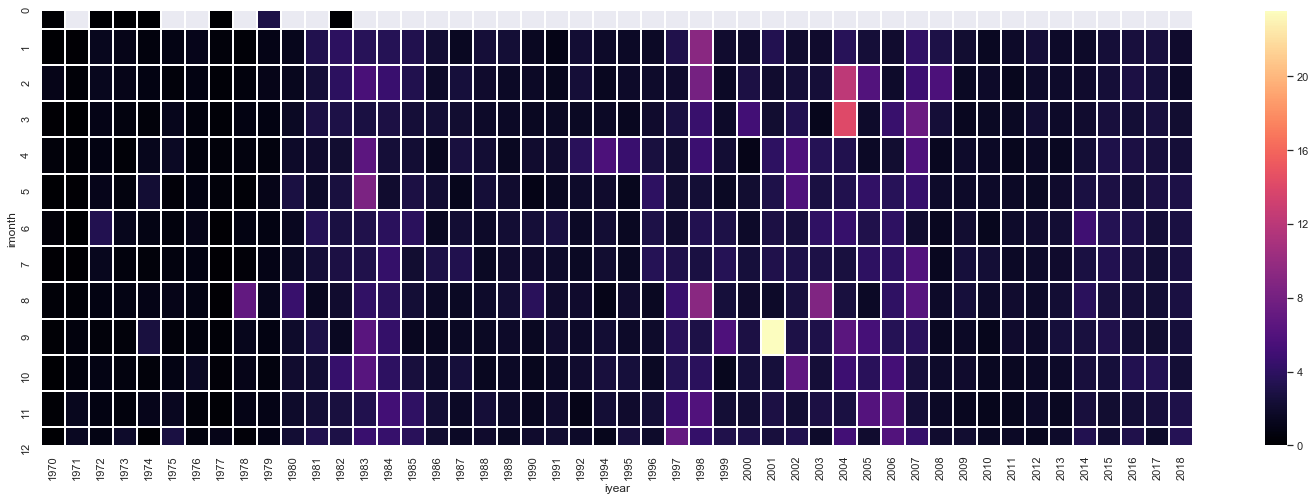

In [98]:
sns.heatmap(pd,cmap='magma',linecolor='white',linewidths=1)

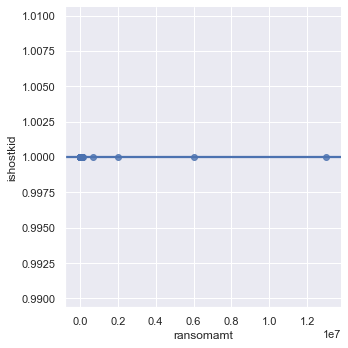

In [99]:
sns.lmplot(x='ransomamt',y='ishostkid',data=aleph)

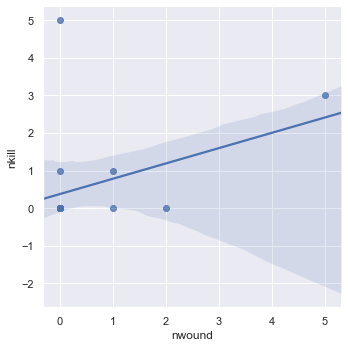

In [100]:
sns.lmplot(x='nwound',y='nkill',data=aleph)

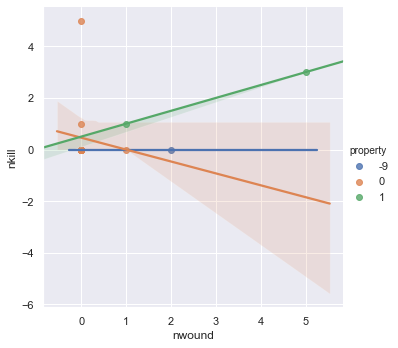

In [101]:
sns.lmplot(x='nwound',y='nkill',data=aleph,hue='property')

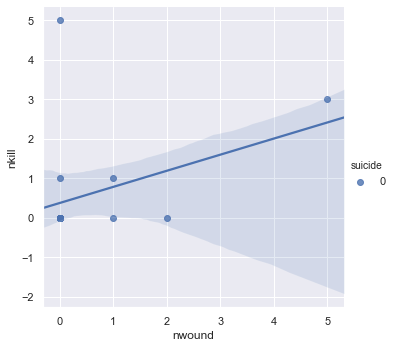

In [102]:
sns.lmplot(x='nwound',y='nkill',data=aleph,hue='suicide')

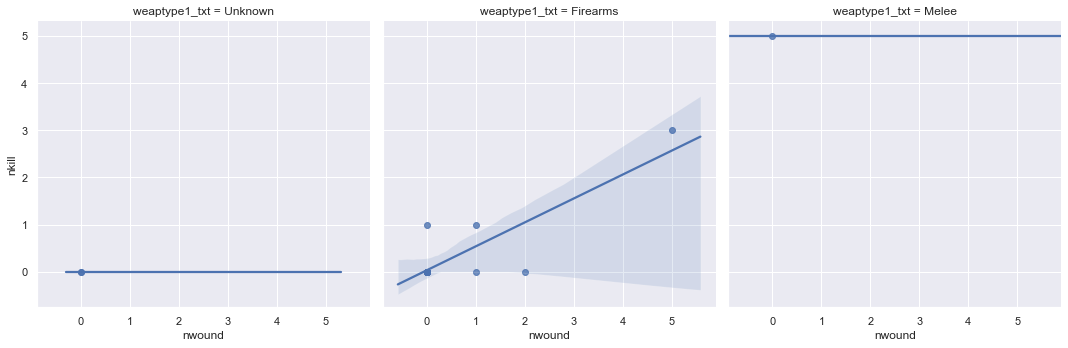

In [103]:
sns.lmplot(x='nwound',y='nkill',data=aleph,col='weaptype1_txt')

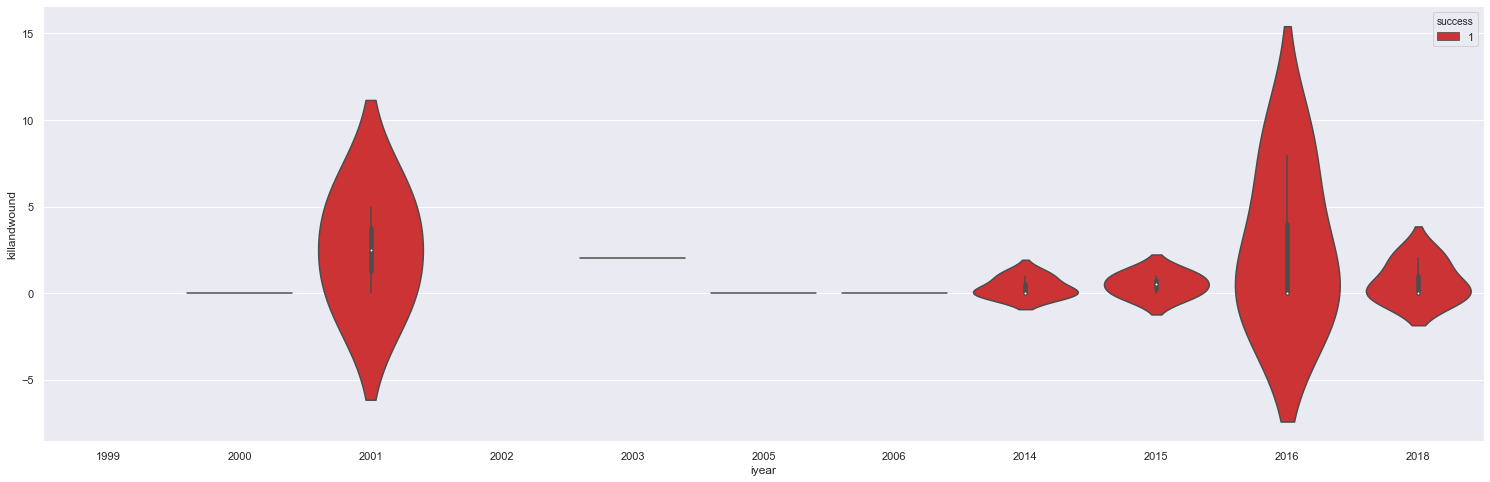

In [104]:
sns.violinplot(x="iyear", y="killandwound", data=aleph,hue='success',palette='Set1')

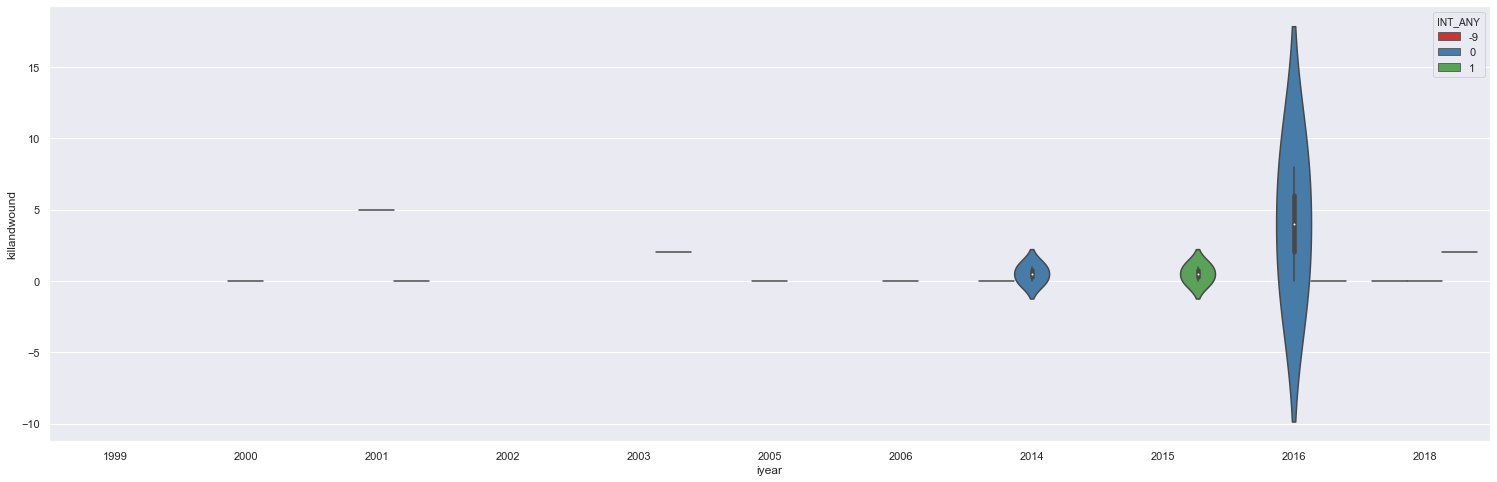

In [105]:
sns.violinplot(x="iyear", y="killandwound", data=aleph,jitter=True,hue='INT_ANY',palette='Set1')

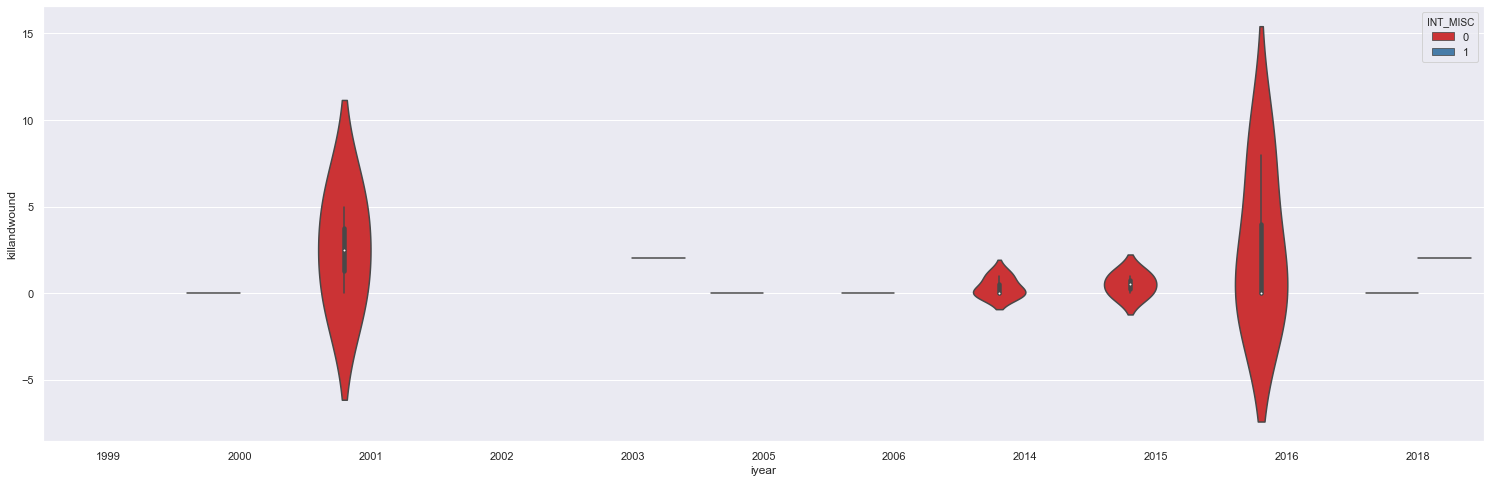

In [106]:
sns.violinplot(x="iyear", y="killandwound", data=aleph,jitter=True,hue='INT_MISC',palette='Set1')

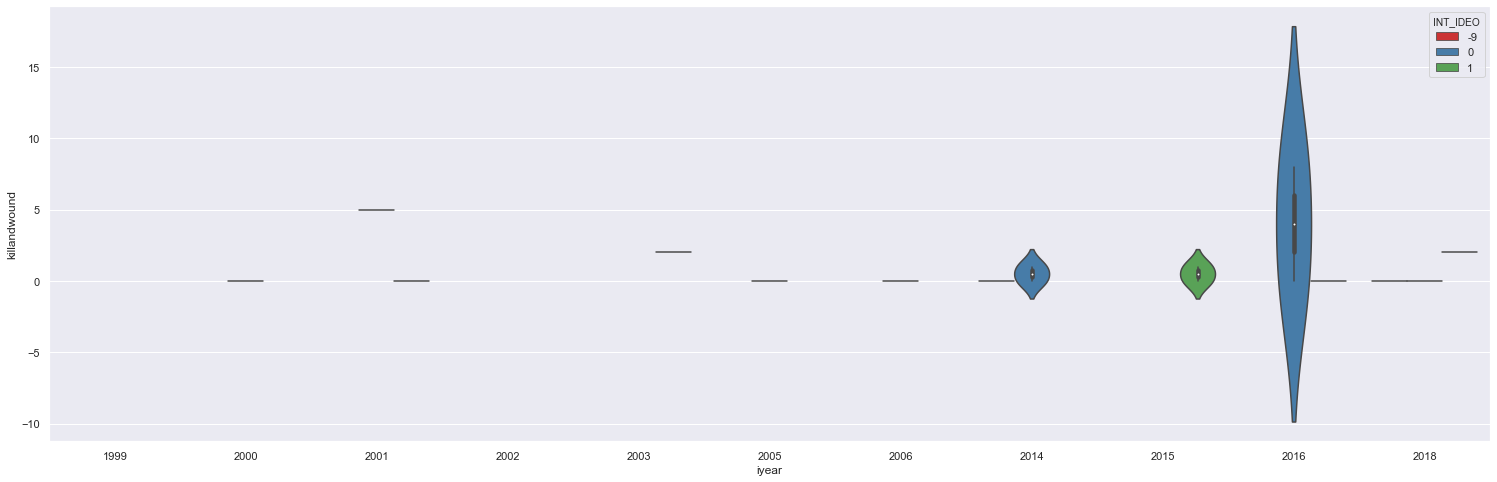

In [107]:
sns.violinplot(x="iyear", y="killandwound", data=aleph,jitter=True,hue='INT_IDEO',palette='Set1')

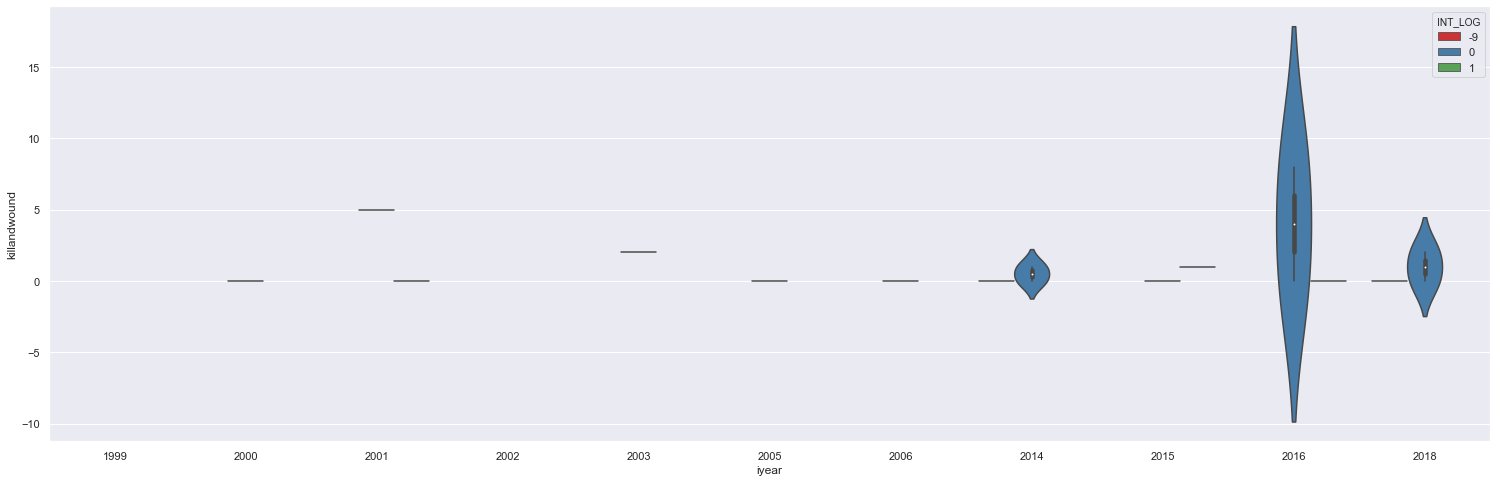

In [108]:
sns.violinplot(x="iyear", y="killandwound", data=aleph,jitter=True,hue='INT_LOG',palette='Set1')

#sns.pairplot(aleph,hue='region_txt',palette='rainbow')

g = sns.JointGrid(x="nwound", y="nkill", data=aleph)
g = g.plot(sns.regplot, sns.distplot)

g = sns.JointGrid(x="country_txt", y="killandwound", data=aleph)
g = g.plot(sns.regplot, sns.distplot)

Text(0.5, 1.0, 'Weapon Types')

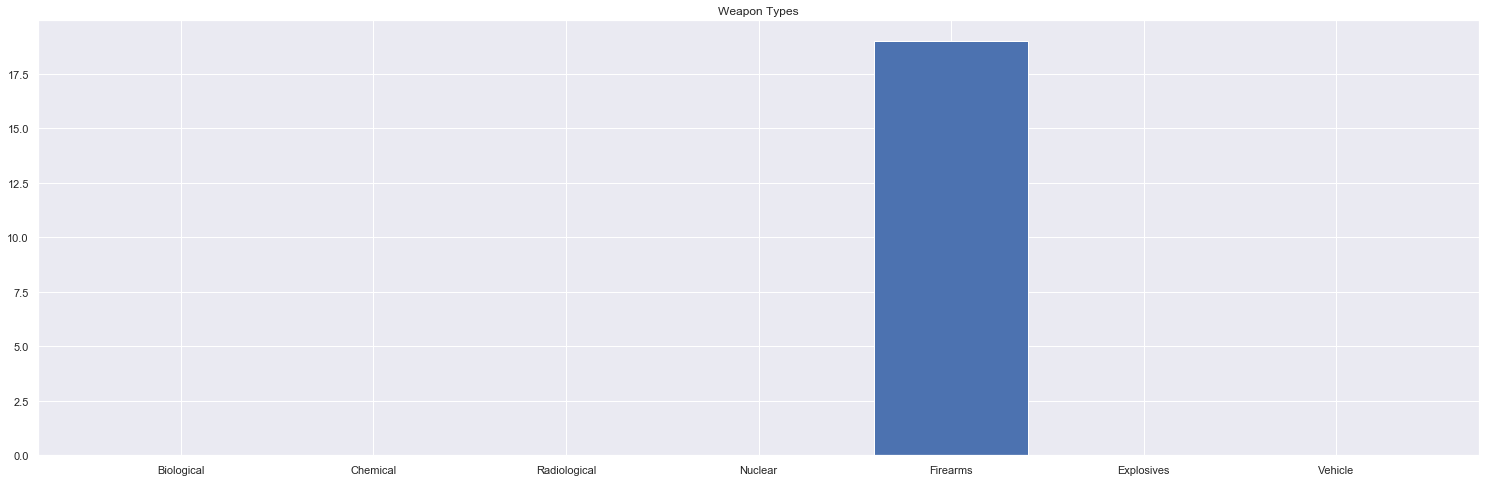

In [109]:
aleph['weaptype1_txt'] == 'Biological'

countbiological = 0
countchemical = 0
countradiological = 0
countnuclear = 0
countfirearms = 0
countexplosives = 0
countvehicle = 0
for x in aleph['weaptype1_txt']:
    if x in 'Biological':
        countbiological += 1
    elif x in 'Chemical':
        countchemical += 1
    elif x in 'Radiological':
        countradiological += 1
    elif x in 'Nuclear':
        countnuclear +=1
    elif x in 'Firearms':
        countfirearms +=1
    elif x in 'Explosives':
        countexplosives +=1
    elif x in 'Vehicle':
        countvehicle +=1
        
Type = ['Biological','Chemical','Radiological','Nuclear','Firearms','Explosives','Vehicle']
Count = [countbiological, countchemical, countradiological, countnuclear, countfirearms, countexplosives, countvehicle]

plt.bar(Type, Count)
plt.title('Weapon Types')

Text(0.5, 1.0, 'Weapon Types')

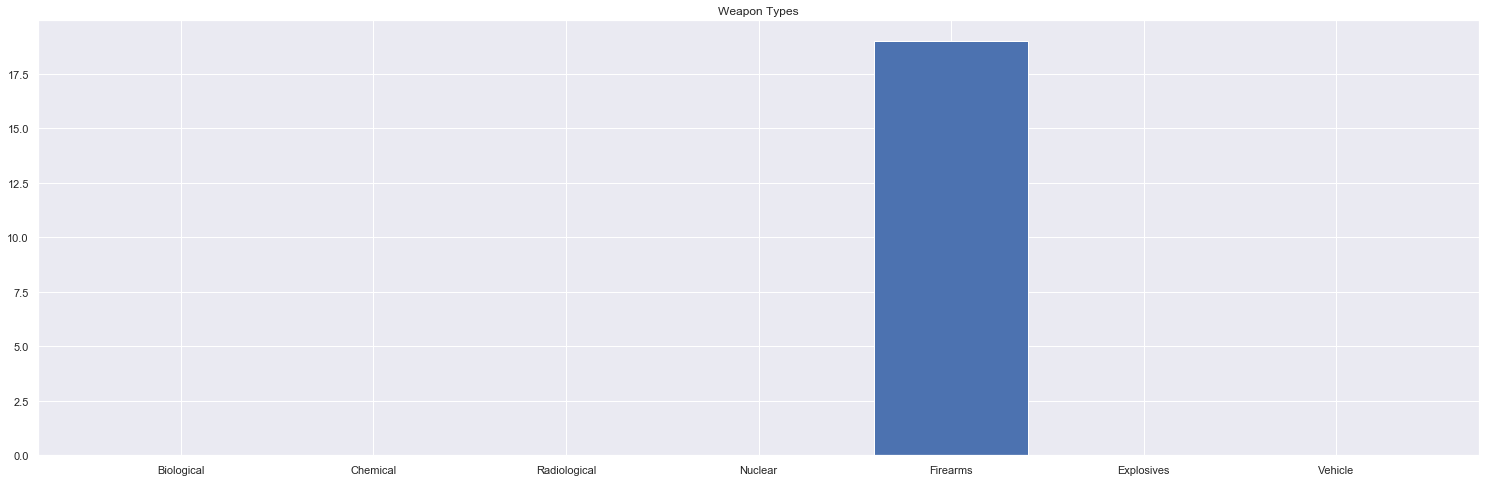

In [110]:
talibanfilter['weaptype1_txt'] == 'Biological'

countbiological = 0
countchemical = 0
countradiological = 0
countnuclear = 0
countfirearms = 0
countexplosives = 0
countvehicle = 0
for x in aleph['weaptype1_txt']:
    if x in 'Biological':
        countbiological += 1
    elif x in 'Chemical':
        countchemical += 1
    elif x in 'Radiological':
        countradiological += 1
    elif x in 'Nuclear':
        countnuclear +=1
    elif x in 'Firearms':
        countfirearms +=1
    elif x in 'Explosives':
        countexplosives +=1
    elif x in 'Vehicle':
        countvehicle +=1
        
weapType = ['Biological','Chemical','Radiological','Nuclear','Firearms','Explosives','Vehicle']
weapCount = [countbiological, countchemical, countradiological, countnuclear, countfirearms, countexplosives, countvehicle]

plt.bar(weapType, weapCount)
plt.title('Weapon Types')

Text(0.5, 1.0, 'Weapon Types')

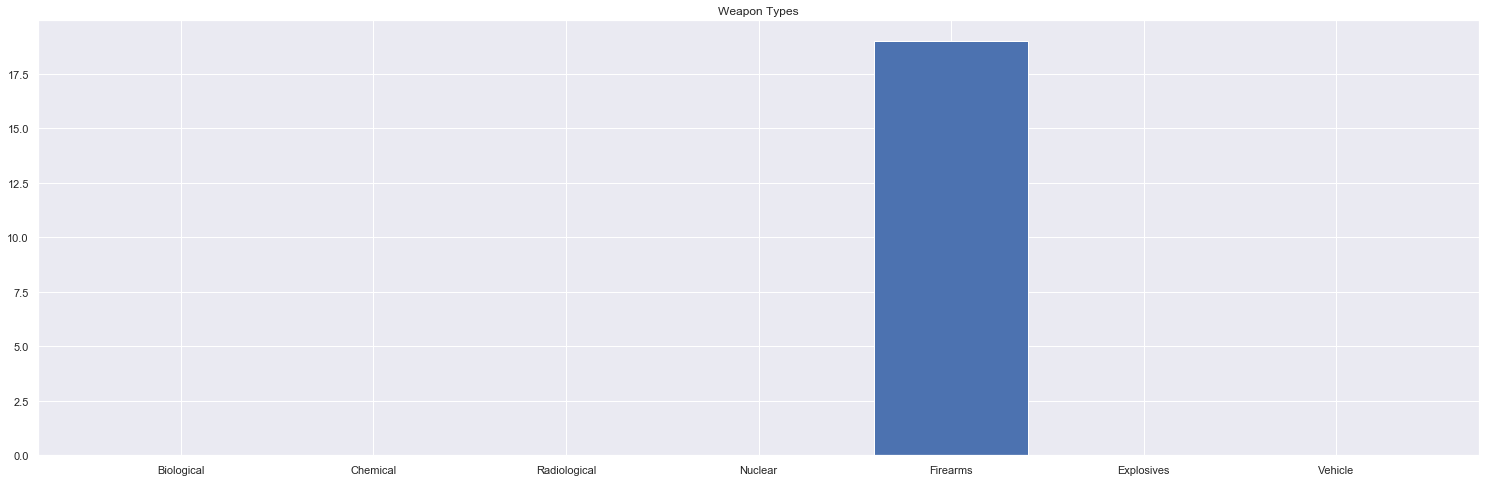

In [111]:
alqaedafilter['weaptype1_txt'] == 'Biological'

countbiological = 0
countchemical = 0
countradiological = 0
countnuclear = 0
countfirearms = 0
countexplosives = 0
countvehicle = 0
for x in aleph['weaptype1_txt']:
    if x in 'Biological':
        countbiological += 1
    elif x in 'Chemical':
        countchemical += 1
    elif x in 'Radiological':
        countradiological += 1
    elif x in 'Nuclear':
        countnuclear +=1
    elif x in 'Firearms':
        countfirearms +=1
    elif x in 'Explosives':
        countexplosives +=1
    elif x in 'Vehicle':
        countvehicle +=1
        
weapType = ['Biological','Chemical','Radiological','Nuclear','Firearms','Explosives','Vehicle']
weapCount = [countbiological, countchemical, countradiological, countnuclear, countfirearms, countexplosives, countvehicle]

plt.bar(weapType, weapCount)
plt.title('Weapon Types')

Text(0.5, 1.0, 'Attack Types')

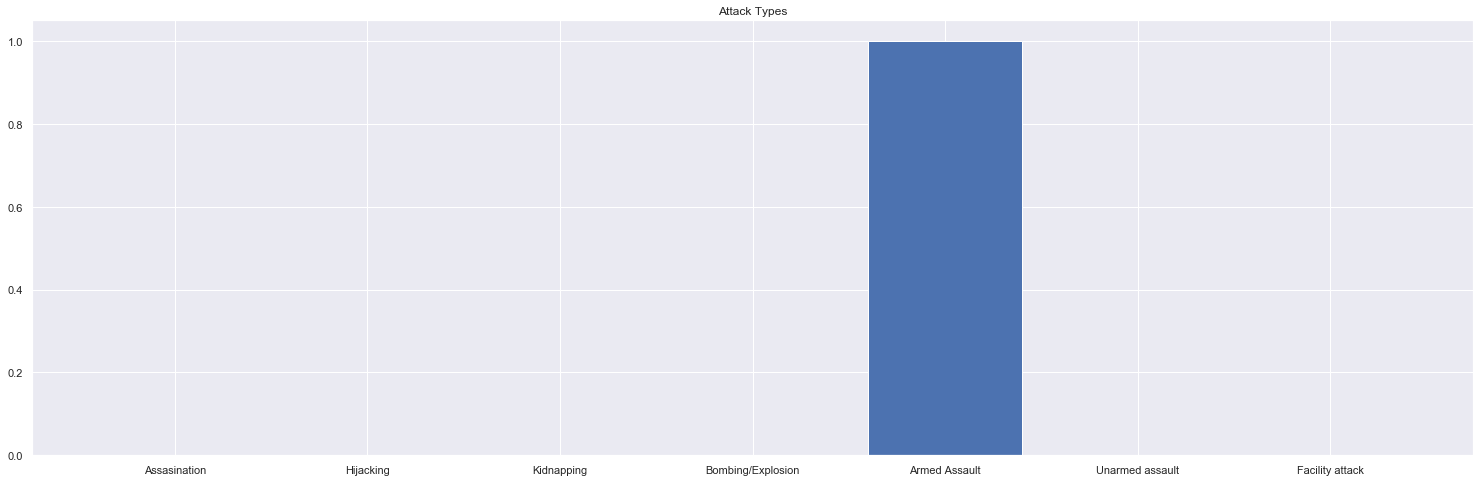

In [112]:
aleph['attacktype1_txt'] == 'Assasination'

counta = 0
counth = 0
countk = 0
countbe = 0
countaa = 0
countua = 0
countfa = 0

for x in aleph['attacktype1_txt']:
    if x in 'Assasination':
        counta += 1
    elif x in 'Hijacking':
        counth += 1
    elif x in 'Kidknapping':
        countk += 1
    elif x in 'Bombing/Explosion':
        countbe +=1
    elif x in 'Armed Assault':
        countaa +=1
    elif x in 'Unarmed Assault':
        countua +=1
    elif x in 'Facility/Infrastructure Attack ':
        countfa +=1
        
attackType = ['Assasination','Hijacking','Kidnapping','Bombing/Explosion','Armed Assault','Unarmed assault','Facility attack']
attackCount = [counta, counth, countk, countbe, countaa, countua, countfa]

plt.bar(attackType, attackCount)
plt.title('Attack Types')

Text(0.5, 1.0, 'Attack Types')

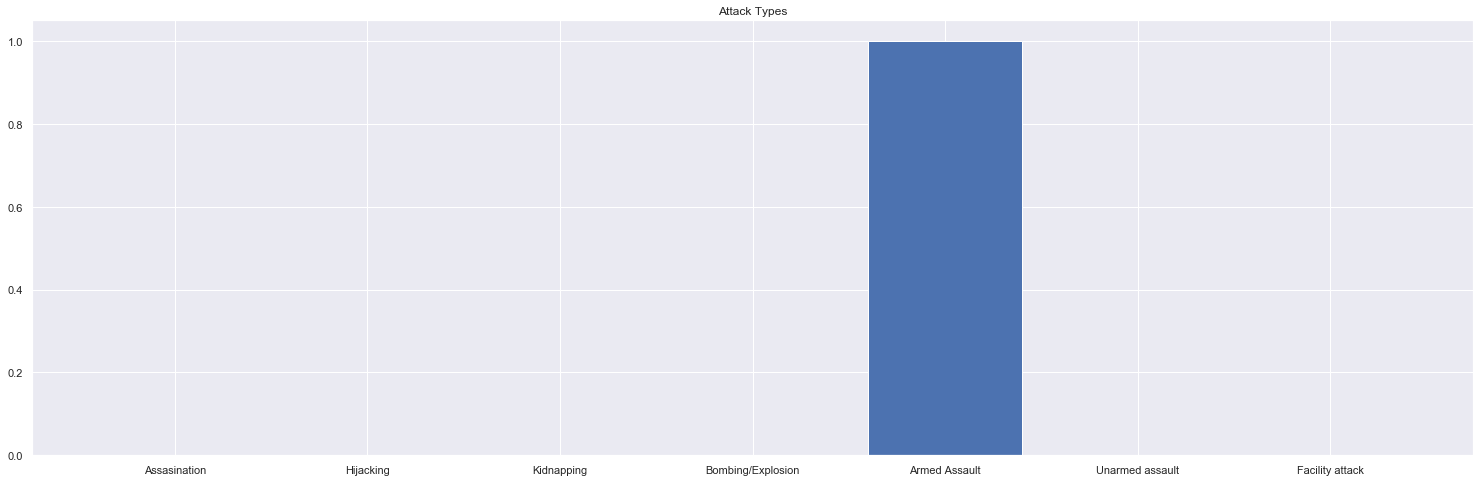

In [113]:
talibanfilter['attacktype1_txt'] == 'Assasination'

counta = 0
counth = 0
countk = 0
countbe = 0
countaa = 0
countua = 0
countfa = 0

for x in aleph['attacktype1_txt']:
    if x in 'Assasination':
        counta += 1
    elif x in 'Hijacking':
        counth += 1
    elif x in 'Kidknapping':
        countk += 1
    elif x in 'Bombing/Explosion':
        countbe +=1
    elif x in 'Armed Assault':
        countaa +=1
    elif x in 'Unarmed Assault':
        countua +=1
    elif x in 'Facility/Infrastructure Attack ':
        countfa +=1
        
attackType = ['Assasination','Hijacking','Kidnapping','Bombing/Explosion','Armed Assault','Unarmed assault','Facility attack']
attackCount = [counta, counth, countk, countbe, countaa, countua, countfa]

plt.bar(attackType, attackCount)
plt.title('Attack Types')

Text(0.5, 1.0, 'Attack Types')

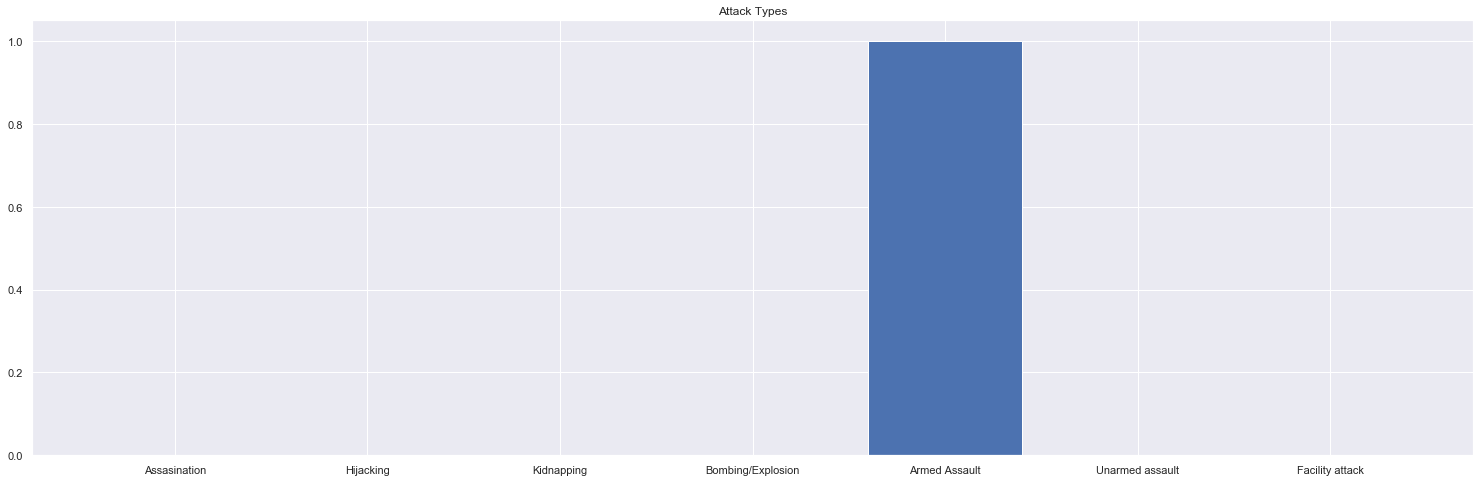

In [114]:
alqaedafilter['attacktype1_txt'] == 'Assasination'

counta = 0
counth = 0
countk = 0
countbe = 0
countaa = 0
countua = 0
countfa = 0

for x in aleph['attacktype1_txt']:
    if x in 'Assasination':
        counta += 1
    elif x in 'Hijacking':
        counth += 1
    elif x in 'Kidknapping':
        countk += 1
    elif x in 'Bombing/Explosion':
        countbe +=1
    elif x in 'Armed Assault':
        countaa +=1
    elif x in 'Unarmed Assault':
        countua +=1
    elif x in 'Facility/Infrastructure Attack ':
        countfa +=1
        
attackType = ['Assasination','Hijacking','Kidnapping','Bombing/Explosion','Armed Assault','Unarmed assault','Facility attack']
attackCount = [counta, counth, countk, countbe, countaa, countua, countfa]

plt.bar(attackType, attackCount)
plt.title('Attack Types')